This Exercise performs some basic Text Processing on the Last 2 Presidential debates between President Trump and Joe Biden.<br>It involves scraping the data and performing some text-preprocessing tasks to understand more about the words spoken by these two Aspirants, during the 2020 Presidential Debates.

[Debate_1](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020)

[Debate_2](https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pywaffle import Waffle
from PIL import Image
import nltk
from nltk import word_tokenize
nltk.download('stopwords') # For stopwords removal
nltk.download('punkt')  # for tokenization
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer  # To lemmatize sentences
nltk.download('wordnet')
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud
import spacy
from collections import defaultdict, Counter
from bs4 import BeautifulSoup
import requests
import string 
import math                                                                                                                                                      
print('All Imported!')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\sisok\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


All Imported!


In [2]:
debate_1 = "https://www.rev.com/blog/transcripts/donald-trump-joe-biden-1st-presidential-debate-transcript-2020"
debate_2 = 'https://www.rev.com/blog/transcripts/donald-trump-joe-biden-final-presidential-debate-transcript-2020/amp'

We need to scrape the data containing the texts from both debates.
Lets define a method that uses beautiful soup to parse the text data and returns two lists, of the interactions of both Trump and Biden.

In [3]:
def scrape_parse(link):
    """Scrape and preprocess text from rev.com,
        For Trump/Biden Presidential Debates
    
    @param,link: URL link to the website(rev.com)
    @return: Two lists (trump and biden)
    """
    source = requests.get(link).text
    soup = BeautifulSoup(source)
    texts = soup.findAll('p')
    corpus = [txt.text for txt in texts]

    if len(link) > 100:
        trump_corpus = [i for i in corpus if i.startswith('Donald')]
        biden_corpus = [i for i in corpus if i.startswith('Joe')]
        moderator = [i for i in corpus if i.startswith('Kristen')]

        # Now we remove their names from start of each sentence
        trump_speech_list = [i[22:] for i in trump_corpus]
        biden_speech_list = [i[19:] for i in biden_corpus]
        moderator = [i[24:] for i in moderator]
        
    else:
        trump_corpus = [i for i in corpus if i.startswith('President')]
        biden_corpus = [i for i in corpus if i.startswith('Vice')]
        moderator = [i for i in corpus if i.startswith('Chris')]

        # Now we remove their names from start of each sentence
        trump_speech_list = [i[35:] for i in trump_corpus]
        biden_speech_list = [i[34:] for i in biden_corpus]
        moderator = [i[23:] for i in moderator]
        
    return trump_speech_list, biden_speech_list, moderator

In [4]:
# getting the list of speeches from the first debate
trump_debate_1, biden_debate_1, chris_corpus = scrape_parse(debate_1)

In [5]:
# getting the list of speeches for the second debate
trump_debate_2, biden_debate_2, kristen_corpus = scrape_parse(debate_2)

Let's create a combined, raw, unfiltered corpus of both candidates sentences, we shall use later for sentiment analysis

In [6]:
trump_total_raw_corpus = trump_debate_1 + trump_debate_2
biden_total_raw_corpus = biden_debate_1 + biden_debate_2

Let's make these Trump and Biden speeches nltk text objects

In [7]:
trump_1 = nltk.Text(trump_debate_1)
trump_2 =  nltk.Text(trump_debate_2)
print(type(trump_1))

<class 'nltk.text.Text'>


In [8]:
biden_1 = nltk.Text(biden_debate_1)
biden_2 = nltk.Text(biden_debate_2)
print(type(biden_1))

<class 'nltk.text.Text'>


<h3>1. Let's see the percentage of times each person took the stage</h3>

In [9]:
first = {'Trump':[len(trump_debate_1)], 'Biden':[len(biden_debate_1)]}
second = {'Trump':[len(trump_debate_2)], 'Biden':[len(biden_debate_2)]}
first_df = pd.DataFrame(first)
second_df = pd.DataFrame(second)

In [10]:
# Let's make each a percent
total_stage1 = len(trump_debate_1 + biden_debate_1)
total_stage2 = len(trump_debate_2 + biden_debate_2)

# Let's use apply and lambda
first_df = first_df.apply(lambda x: round(x / total_stage1, 2))
second_df = second_df.apply(lambda x: round(x / total_stage2, 2))

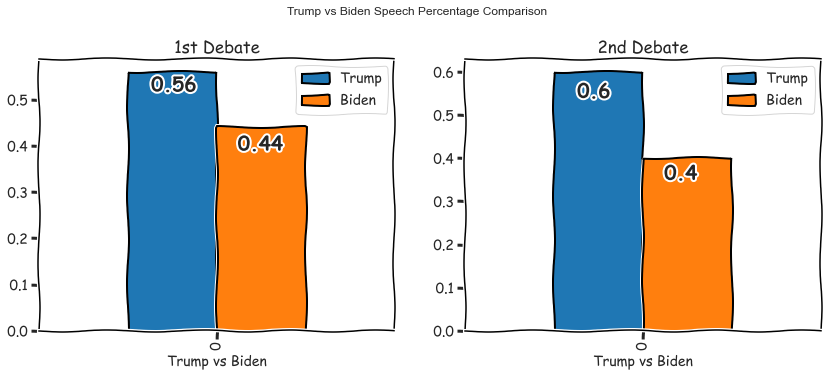

In [11]:
sns.set_style('ticks')
fig = plt.figure(figsize=(14,5)) # create figure
plt.suptitle('Trump vs Biden Speech Percentage Comparison', y=1.025)

plt.xkcd()

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

first_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('1st Debate')
ax0.set_xlabel('Trump vs Biden')
ax0.annotate(str(first_df.loc[0,'Trump']), (-0.185, 0.518), fontsize=20, fontweight='bold')
ax0.annotate(str(first_df.loc[0,'Biden']), (0.059, 0.39), fontsize=20, fontweight='bold')

second_df.plot(kind='bar', edgecolor='black', linewidth=2, ax=ax1)
plt.title('2nd Debate')
plt.xlabel('Trump vs Biden')
ax1.annotate(str(second_df.loc[0,'Trump']), (-0.185, 0.54), fontsize=20, fontweight='bold')
ax1.annotate(str(second_df.loc[0,'Biden']), (0.06, 0.35), fontsize=20, fontweight='bold')


plt.show()

#plt.rcdefaults()  # to stop xkcd plots

In [12]:
print(f'Trump spoke {len(trump_debate_1)} times in debate one and {len(trump_debate_2)} times in two.')
print(f'Biden spoke {len(biden_debate_1)} times in debate one and {len(biden_debate_2)} times in two.')

Trump spoke 314 times in debate one and 197 times in two.
Biden spoke 250 times in debate one and 131 times in two.


Let's clean the texts and remove punctuations and stopwords

In [13]:
def tokenize_words(corpus):
    """This method converts a sentence into
        text tokens or grouped sequence of characters
        
        @param corpus: Is a text document of multiple sentences
        @return: A list of tokenized words
    """
    word_list = []
    for sentence in corpus:
        word_list += word_tokenize(sentence)
    return word_list

In [14]:
def remove_punctuations(corpus):
    """This method removes punctuations from the
        sentences in a corpus
        
        @param corpus: Is a text document of multiple sentences
        @return: A list of words rid of punctuations
    """
    word_list = tokenize_words(corpus)
    words_noPunct = [i for i in word_list if i not in string.punctuation]
    return words_noPunct

In [15]:
def remove_stopwords(corpus):
    """This takes a corpus of sentences and by default,
        it removes punctuations, and removes stopwords
        
        @param: corpus is a document containing sentences
        @return: A list of words with no punctuation/stopwords
    """
    word_list = remove_punctuations(corpus)
    words_cleaned = [i for i in word_list if i not in stopwords.words('english')]
    return words_cleaned

For Trump...

In [16]:
trump_1 = remove_stopwords(trump_1)
trump_2 = remove_stopwords(trump_2)
trump_total_words = trump_1 + trump_2

# Now make these nltk text objects
trump_1 = nltk.text.Text(trump_1)
trump_2 = nltk.text.Text(trump_2)
trump_total_words = nltk.text.Text(trump_total_words)

print(f'Trump total words is {len(trump_total_words)}')

Trump total words is 9243


For Biden...

In [17]:
biden_1 = remove_stopwords(biden_1)
biden_2 = remove_stopwords(biden_2)
biden_total_words = biden_1 + biden_2

# Now make these nltk text objects
biden_1 = nltk.text.Text(biden_1)
biden_2 = nltk.text.Text(biden_2)
biden_total_words = nltk.text.Text(biden_total_words)
print(f'Biden total words is {len(biden_total_words)}')

Biden total words is 7936


<h3>2. Let's check the Lexical-richness or Diversity of the words spoken by Trump and Biden</h3>

In [18]:
def vocab(text):
    """find the unique tokens or vocab,
    In a given text object
    """
    vocabulary = list(set(text))
    return vocabulary

print(f'Trump\'s unique words are {len(vocab(trump_total_words))}')
print(f'Biden\'s unique words are {len(vocab(biden_total_words))}' )

Trump's unique words are 1897
Biden's unique words are 2020


In [19]:
def lexical_diversity(text):
    """find the ratio of the vocabulary to,
        total tokens in the text.
    """
    vocabulary = vocab(text)
    return round(len(vocabulary)/len(text), 2)

In [20]:
# For the word-count comparison
word_count_df = pd.DataFrame(columns=['Word_Count'], index=['Trump', 'Biden'])

for index, row in word_count_df.iterrows():
    if index is 'Trump':
        row['Word_Count'] = len(trump_total_words)
    else:
        row['Word_Count'] = len(biden_total_words)

# For the lexical diversity comparison
lex_var_df = pd.DataFrame(columns=['Lexical-Diversity'], index=['Trump', 'Biden'])

for index, row in lex_var_df.iterrows():
    if index is 'Trump':
        row['Lexical-Diversity'] = lexical_diversity(trump_total_words)
    else:
        row['Lexical-Diversity'] = lexical_diversity(biden_total_words)
lex_var_df

Lexical-Diversity
Trump              0.21
Biden              0.25

In [21]:
word_count_df

Word_Count
Trump       9243
Biden       7936

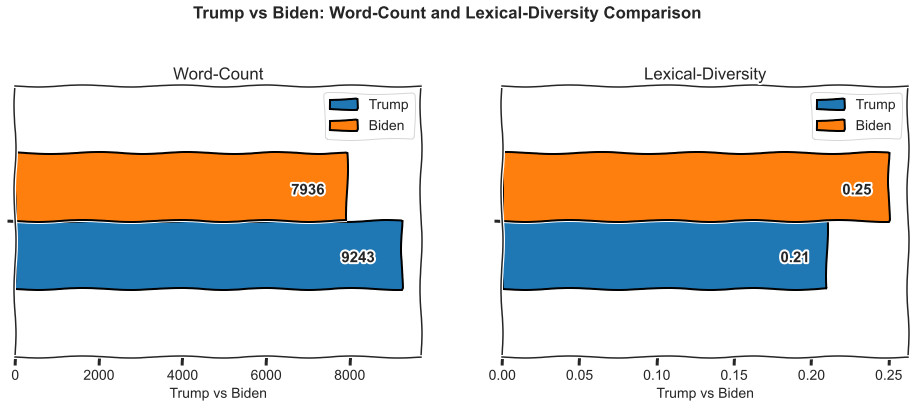

In [22]:
sns.set_style('ticks')
fig = plt.figure(figsize=(16,5)) # create figure
plt.suptitle('Trump vs Biden: Word-Count and Lexical-Diversity Comparison', y=1.1, fontweight='bold')

ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

word_count_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax0)
ax0.set_title('Word-Count')
ax0.set_xlabel('Trump vs Biden')
ax0.set_yticklabels('')
ax0.annotate(str(word_count_df.loc['Biden','Word_Count']), (6600, 0.099), fontsize=15, fontweight='bold')
ax0.annotate(str(word_count_df.loc['Trump','Word_Count']), (7800, -0.15), fontsize=15, fontweight='bold')

lex_var_df.T.plot(kind='barh', edgecolor='black', linewidth=2, ax=ax1)
plt.title('Lexical-Diversity')
plt.xlabel('Trump vs Biden')
ax1.set_yticklabels('')
ax1.annotate(str(lex_var_df.loc['Biden','Lexical-Diversity']), (0.22, 0.099), fontsize=15, fontweight='bold')
ax1.annotate(str(lex_var_df.loc['Trump','Lexical-Diversity']), (0.18, -0.15), fontsize=15, fontweight='bold')

plt.show()

1. Trump utters a total 9243 words(rid of stopwords and punctuations) comprising of 1897 unique words, giving a Lexical-Richness score of 21%.

2. Biden utters a total 7936 words(rid of stopwords and punctuations) comprising of 2020 unique words, giving a Lexical-Richness score of 25%.

3. Know that in both debates Trump utters more words than Biden in a ratio of roughly (56:44) in first debate and (59:41) in second debate.


<h3>3. TFIDF for both Presidential Candidates</h3>

So what are the candidates even talking about, are there any relatively unique areas to each candidate, as deductible from the words spoken at these debates?... Let's find out using TFIDF.

In [23]:
# First let's lemmatize the words to achieve a similar base “stem” for a word

def lemmatize_words(word_list):
    lemma = WordNetLemmatizer()
    lemmatized = [lemma.lemmatize(i) for i in word_list]
    
    return lemmatized

In [24]:
trump_lemma = lemmatize_words(trump_total_words)
biden_lemma = lemmatize_words(biden_total_words)

Next, we create a simple TFIDF class for the documents

In [25]:
class Tfidf(object):
    """instantiate a Tfidf object to compute TF-IDF scores
        across a corpus of text documents.
    """
    def __init__(self, docs, doc_names):
        self.docs = docs
        self.doc_names = doc_names
        
    def _tf(self, word, doc):
        lenOfDoc = len(doc)
        if lenOfDoc < 1: return 0
        else: return doc.count(word) / lenOfDoc

    def _contains(self, word, docs):
        return sum(1 for doc in docs if word in doc)

    def _idf(self, word, docs):
        docsCount = self._contains(word, docs)
        if docsCount < 1 : return 0
        else: return math.log(len(docs) / docsCount)

    def tfidf(self):
        print('-----------------------------------------------------------')
        master = {}
        for i, doc in enumerate(docs):
            print("Top words in document {}".format(doc_names[i]))
            master[doc_names[i]] = {}
            scores = {word: (self._tf(word,doc) * self._idf(word, docs)) for word in doc}
            sorted_words = sorted(scores.items(), key=lambda x: x[1], reverse=True)
            for word, score in sorted_words[:10]:
                print("\tWord: {}, TF-IDF: {}".format(word, round(score, 5)))
                master[doc_names[i]][word] = [round(score, 6)]
            print()
        return master

In [26]:
# Let's instantiate a Tfidf class object
docs = [trump_lemma, biden_lemma]
doc_names = ['Trump-Corpus', 'Biden-Corpus']

text_docs = Tfidf(docs, doc_names)

In [27]:
# Let's get the TFIDF summary for Trump and Biden
tfidf_summary = text_docs.tfidf()

-----------------------------------------------------------
Top words in document Trump-Corpus
	Word: ago, TF-IDF: 0.00127
	Word: Chris, TF-IDF: 0.00097
	Word: built, TF-IDF: 0.00097
	Word: nobody, TF-IDF: 0.0009
	Word: gave, TF-IDF: 0.0009
	Word: called, TF-IDF: 0.0009
	Word: cage, TF-IDF: 0.00082
	Word: disaster, TF-IDF: 0.00075
	Word: individual, TF-IDF: 0.00067
	Word: mandate, TF-IDF: 0.00067

Top words in document Biden-Corpus
	Word: create, TF-IDF: 0.00096
	Word: folk, TF-IDF: 0.00087
	Word: federal, TF-IDF: 0.00087
	Word: serious, TF-IDF: 0.00079
	Word: running, TF-IDF: 0.0007
	Word: situation, TF-IDF: 0.0007
	Word: Americans, TF-IDF: 0.0007
	Word: lie, TF-IDF: 0.00061
	Word: God, TF-IDF: 0.00061
	Word: someone, TF-IDF: 0.00061



Let's see the dictionary of top 10 TFIDF words from Trump and Biden

In [28]:
tfidf_summary

{'Trump-Corpus': {'ago': [0.001275],
  'Chris': [0.000975],
  'built': [0.000975],
  'nobody': [0.0009],
  'gave': [0.0009],
  'called': [0.0009],
  'cage': [0.000825],
  'disaster': [0.00075],
  'individual': [0.000675],
  'mandate': [0.000675]},
 'Biden-Corpus': {'create': [0.000961],
  'folk': [0.000873],
  'federal': [0.000873],
  'serious': [0.000786],
  'running': [0.000699],
  'situation': [0.000699],
  'Americans': [0.000699],
  'lie': [0.000611],
  'God': [0.000611],
  'someone': [0.000611]}}

Let's create a DataFrame from these dicts and also prepare for the word-cloud

In [29]:
biden_tfidf = pd.DataFrame(tfidf_summary['Biden-Corpus']).T
biden_tfidf.columns = ['Val']
biden_tfidf.head()

Val
create   0.000961
folk     0.000873
federal  0.000873
serious  0.000786
running  0.000699

In [30]:
trump_tfidf = pd.DataFrame(tfidf_summary['Trump-Corpus']).T
trump_tfidf.columns = ['Val']
trump_tfidf.head()

Val
ago     0.001275
Chris   0.000975
built   0.000975
nobody  0.000900
gave    0.000900

Next, let's define a method that iterates through the data frames and returns a list of words multiplied by their weights for the word-cloud

In [31]:
def find_cloud_list(df):
    """This method converts the TFIDF values in a DataFrame
        to a word list as a percentage of total values
        
        @param df: A DataFrame of TFIDF values
        @return: A list of processed values
    """
    df['Pct'] = df['Val'].apply(lambda x: x * 100000)
    df['Pct'] = round((df['Pct'].apply(lambda x: x / sum(df.Pct)))*100, 2)

    master_list = []

    for index, row in df.iterrows():
        y = (index+',') * int(row['Pct'])
        x = y.split(',')[:-1]
        master_list.extend(x)
    
    return master_list

In [32]:
trump_cloud_list = find_cloud_list(trump_tfidf)
biden_cloud_list = find_cloud_list(biden_tfidf)

Plotting the word-cloud objects

In [33]:
def plot_word_cloud(text_list, color):
    """This method plots a word-cloud object 
        
        @param text_list: A list of processed numerical values
        @return: None ('it just plots the word-cloud object')
    """
    strr = ''
    for i in text_list:
        if type(i) is not str:
            i = i[0]
        strr+=i
        strr+=','

    # Instantiate the word-cloud object
    wc = WordCloud(background_color=color, max_words=len(strr))

    # Generate the word-cloud object
    wc.generate(strr)

    # plot the word-cloud
    fig = plt.figure()
    fig.set_figwidth(14) # set width
    fig.set_figheight(18) # set height

    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.show()

Let's see Trump's TFIDF word-cloud

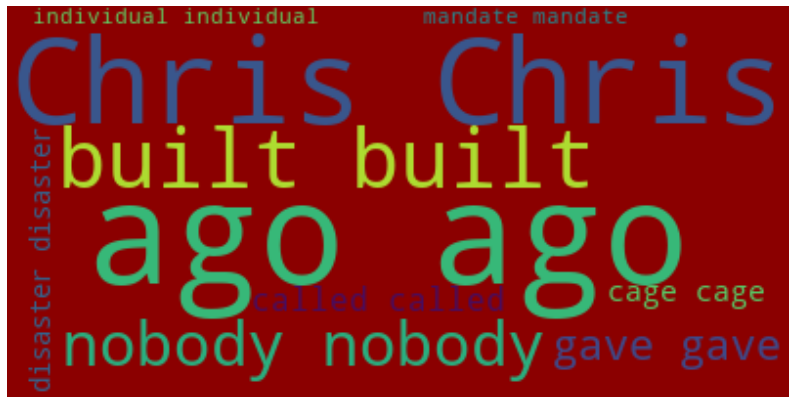

In [34]:
plot_word_cloud(trump_cloud_list, 'darkred')

Let's see Biden's TFIDF word-cloud

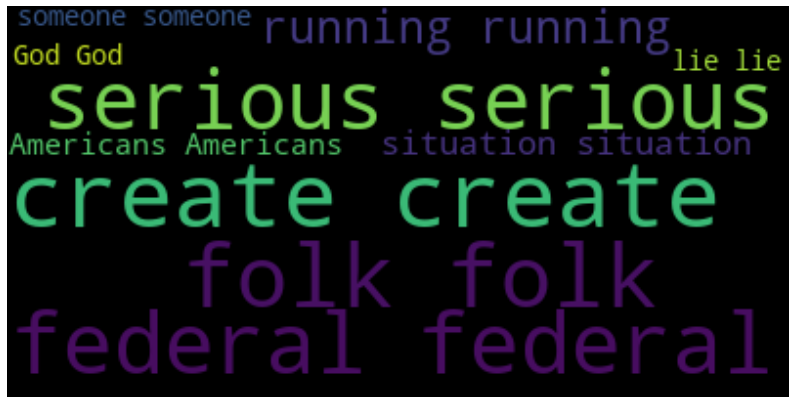

In [35]:
plot_word_cloud(biden_cloud_list, 'black')

<h3>4. Some Questions Asked...</h3>

Let's look at some of the questions thrown by the moderators Chris Wallace(1st debate) and Kristen Welker(2nd debate)... As well as some of the responses from Trump and Biden.


We can see from both debates that some of the queestions raised by Chris Wallace, bordered on
1. Supreme Court
2. Obama-care
3. Economy
4. Race / Justice
5. Law Enforcement
6. Election Integrity
7. COVID

While Kristen covered topics like
1. COVID
2. National Security
3. America / American Families
4. Minimum-wage
5. Immigration
6. Race / Black-Lives-Matter
7. leadership

Let's change the sentences spoken by Trump and Biden, to lower-case, so as to perform some sentiments analysis

In [36]:
# 1. make all sentences lower
biden_total_raw_corpus = [i.lower() for i in biden_total_raw_corpus]
trump_total_raw_corpus = [i.lower() for i in trump_total_raw_corpus]

<h3>5. Sentiment-Analysis with Microsoft Azure-SDK:</h3>

First import credentials and required modules from Azure, including the authenticated TextAnalyticsClient

In [37]:
from _text_analytics_keys import client 
from azure.ai.textanalytics import TextAnalyticsClient
from azure.core.credentials import AzureKeyCredential

Next, we define a Sentiment-Analysis function that takes the client and the speech sentences. 

In [38]:
def sentiment_analysis(client, docs):
    """This method applies AzureML sentiments analysis
        to processed text documents
        
        @param client: the AzureML TextAnalyticsClient
        @param docs: A list of a single long text
        @return: A dictionary of sentences and sentiments
    """
    
    response = client.analyze_sentiment(documents=docs)[0]
    sent_dict = {'Sentence':[], 'Sentiment':[], \
                 'Overall_Score':{'Positive':response.confidence_scores.positive, \
                                 'Neutral':response.confidence_scores.neutral, \
                                 'Negative':response.confidence_scores.negative}}
    
    for idx, sentence in enumerate(response.sentences, 1):
        sent_dict['Sentence'].append(sentence.text)
        sent_dict['Sentiment'].append(sentence.sentiment)
        
    return sent_dict


Next, we define a function to extract key phrases from sentences we select, using the TextAnalyticsClient

In [39]:
def key_phrase_extraction(client, docs):
    """This method applies AzureML key_phrase_extraction
        to extract key phrases from text documents
        
        @param client: the AzureML TextAnalyticsClient
        @param docs: A list of a single long text
        @return: A list of key phrases
    """
    

    try:
        response = client.extract_key_phrases(documents = docs)[0]
        
        master_list = []
        strr = ''
        if not response.is_error:
            for phrase in response.key_phrases:
                strr+=phrase
                strr+=', '
            master_list.append(strr[:-2])
                
        else:
            print(response.id, response.error)

    except Exception as err:
        print("Encountered exception. {}".format(err))
        
    return master_list

Then we also define a search-corpus function that finds sentences based on the words and corpus we pass to it.

In [40]:
def search_corpus(word_list, corpus):
    """This method searches for sentences in a corpus,
        based on the word-list. 
    
    @param: word_list, a list of words to search on
    @param: corpus a corpus of sentences stored in a list
    @return: A list of a single string of searched sentences combined.
    """
    _list = []
    for word in word_list:
        _list.extend([i for i in corpus if word in i])
    
    sent = ''
    master_list = []
    for sentence in _list:
        sent+=sentence
        if len(sent) >= 4000:
            master_list.append([sent])
            sent = ''
    master_list.append([sent])
    
    return master_list

Next, we define a function that converts the dictionary from the sentiment function to a data frame for more analysis

In [41]:
def sentiments_to_df(sentiments_dict_list):
    """This method takes the list of dict objects 
        returned from the sentiment-analysis function 
        and creates a DataFrame with it.
    
        @param: sentiments_dict is a dictionary
        @return: returns a dataframe and a dictionary
                of overall sentiment scores per query
    """

    df = None
    for i in range(len(sentiments_dict_list)):
        x = sentiments_dict_list[i]
        if df is None:
            total = x['Overall_Score']
            del x['Overall_Score']
            df = pd.DataFrame(x)
        else:
            y = x['Overall_Score']
            for key, val in y.items():
                total[key] += val
            del x['Overall_Score']
            idf = pd.DataFrame(x)
            df = pd.concat([df, idf], ignore_index=True)
            
    for key, val in total.items():
        total[key] = [round(val/len(sentiments_dict_list), 3)] 

    return df, total

Next, we define the apply sentiments and extractions function that applies the search, sentiments and extraction functions for each search query 

In [42]:
def apply_sentiments_and_extractions(word_list, corpus):
    """This method applies the sentiments analysis and
        key-phrase-extraction methods to a corpus based
        on a list of words searched on.
        
        @param word-list: A list of words for the 
                    search corpus function
        @param corpus: A list of multiple text sentences
        @return: A DataFrame and a dictionary of total sentiments
    """
    
    searched = search_corpus(word_list, corpus)
    sentiments = [sentiment_analysis(client, i) for i in searched]
    df, total_sentiments = sentiments_to_df(sentiments)
    
    # To extract Key-phrases for each sentence in df
    for i in range(len(df)):
        sentence = [df.loc[i, 'Sentence']]
        df.loc[i, 'Key-phrases'] =  key_phrase_extraction(client, sentence)
    
    return df, total_sentiments

Finally, for sentiments and Phrase-extraction, we define the plot sentiments function that plots each sentiment summary as a pie chart.

In [43]:
def plot_sentiments(biden, trump, title, colours):
    """This method plots double pie-charts for the
        sentiments analysis function of both candidates.
        
        @param biden: A dictionary of Biden's sentiments per query
        @param trump: A dictionary of Trump's sentiments per query
        @return: None (just plots the double pie-charts)
    """
    
    biden = pd.DataFrame(biden).T
    biden.columns = ['total']
    trump = pd.DataFrame(trump).T
    trump.columns = ['total']

    
    sns.set_style('ticks')
    fig = plt.figure(figsize=(16,8)) # create figure
    plt.suptitle(f'Trump vs Biden: Sentiments-Analysis-Summary on {title}', y=1.1, fontweight='bold')

    ax0 = fig.add_subplot(1, 2, 1) # add subplot 1 (1 row, 2 columns, first plot)
    ax1 = fig.add_subplot(1, 2, 2) # add subplot 2 (1 row, 2 columns, second plot). See tip below**

    
    colors_list = colours
    explode_list = [0.1, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

    biden['total'].plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None, 
                     pctdistance= 1.12,
                     colors=colors_list,
                     explode=explode_list,
                   ax=ax0)

    # Let's scale the title up to match the pctdistance too

    ax0.set_title('Biden Sentiments-Analysis Summary', y=1.12)
    ax0.axis('equal')  # This sets the Pie chart to look like a perfect circle
    ax0.legend(labels=biden.index, loc='upper left')
    
    trump['total'].plot(kind='pie',
                     autopct='%1.1f%%',
                     startangle=90,
                     shadow=True,
                     labels=None, 
                     pctdistance= 1.12,
                     colors=colors_list,
                     explode=explode_list,
                   ax=ax1)
    ax1.set_title('Trump Sentiments-Analysis Summary', y=1.12)
    ax1.axis('equal')  # This sets the Pie chart to look like a perfect circle
    ax1.legend(labels=trump.index, loc='upper right')

    plt.show()

    
    

<h3> 6. Parts-Of-Speech-Tagging with Spacy:</h3>
    
Let's define the Parts-Of-Speech function with SpaCY that will return the counts of unique parts of speech per query

In [44]:
def parts_of_speech_tagging(key_phrases_df):
    """This method takes a DataFrame with a column
        of key-phrases per Candidate, per query and 
        computes the POS tags for each phrase
        
        @param:key_phrases is a DataFrame with a 
                column of Key-phrass
        @return: A dict with each POS tag as key and
                count per tag as value
    """
    listt = list(key_phrases_df['Key-phrases'])
    tags_list = []
    
    # instantiate a spaCY load object
    sp = spacy.load('en_core_web_sm')
    
    # Now iterate through listt and append tags
    for key_phrase in listt:
        if type(key_phrase) is not str:
            key_phrase = key_phrase[0]
        
        if key_phrase is not '':
            sen = sp(key_phrase)
            for i in range(1000):
                try:
                    tags_list.append(sen[i].pos_)
                except:
                    break

    return dict(Counter(tags_list))
    

<h3>QUEST 1:Trump and Biden sentiments and key phrases on Jobs and Wages</h3>

For Trump on Wages and Jobs...

In [45]:
word_list = ['jobs', 'wage', 'tax']
corpus = trump_total_raw_corpus

trump_jobs_df, trump_jobs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [46]:
trump_jobs_df.head(20)

Sentence Sentiment  \
0   they had the slowest economic recovery since 1...  negative   
1   also, they took over something that was down h...   neutral   
2   all you had to do is turn on the lights and yo...   neutral   
3   but they had the slowest economic recovery sin...  negative   
4     when the stock market goes up, that means jobs.   neutral   
5                                it also means 401ks.   neutral   
6   if you got in, if you ever became president wi...   neutral   
7                    i’ll tell you what, you’ll lose.  negative   
8   half of the companies that have poured in here...   neutral   
9   and plenty of companies that are already here,...   neutral   
10  [crosstalk 00:20:25] they will leave and you w...  positive   
11                       i brought back 700,000 jobs.   neutral   
12                         they brought back nothing.   neutral   
13  they gave up on manufacturing.i want to open t...  negative   
14  the transmittal rate to the teachers is very s...  negative   
15                    but i want to open the schools.   neutral   
16                       we have to open our country.   neutral   
17                 we’re not going to have a country.   neutral   
18                                 you can’t do this.   neutral   
19                 we can’t keep this country closed.   neutral   

                                          Key-phrases  
0         slowest recovery, slowest economic recovery  
1                                                  []  
2                                       [lights, lot]  
3           [slowest economic recovery, stock market]  
4                                [stock market, jobs]  
5                                                [ks]  
6                           [president, ideas, taxes]  
7                                              [i’ll]  
8                                   [half, companies]  
9                                 [companies, places]  
10  [depression, likes, miracle, manufacturing, cr...  
11                                             [jobs]  
12                                                 []  
13                           [manufacturing, schools]  
14                       [teachers, transmittal rate]  
15                                          [schools]  
16                                          [country]  
17                                          [country]  
18                                                 []  
19                                          [country]

In [47]:
trump_jobs_sentiments

{'Positive': [0.21], 'Neutral': [0.07], 'Negative': [0.72]}

In [48]:
len(trump_jobs_df)

93

Let's see a few positive response sentences from Trump

In [49]:
count = 0
for index, row in trump_jobs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1
    

[crosstalk 00:20:25] they will leave and you will have a depression, the likes of which you’ve never seen.… a miracle to bring back manufacturing.

he’ll close down the country if one person in our massive bureaucracy says we should close it down.when they put us in there, they did us a great disservice, they were going to take away our businesses.

he said we have to help our small businesses by raising the minimum wage.

it should be a state option.how are you helping your small businesses when you’re forcing wages?

he passed a tax bill that gave us all these privileges for depreciation and for tax credits.

and it’ll show how successful, how great this company is.

it’s called china.success is going to bring us together.

we are on the road to success.



Let's see a few negative sentiments responses from Trump on Jobs/Wages/Taxes

In [50]:
count = 0
for index, row in trump_jobs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1
    

they had the slowest economic recovery since 1929. it was the slowest recovery.

but they had the slowest economic recovery since 1929, and let me tell you about the stock market.

i’ll tell you what, you’ll lose.

they gave up on manufacturing.i want to open the schools.

the transmittal rate to the teachers is very small.

people are losing their jobs.

they’re committing suicide.

there’s depression, alcohol, drugs at a level that nobody’s ever seen before.

there’s abuse, tremendous abuse.

i’ve said it often, the cure cannot be worse than the problem itself, and that’s what’s happening.

i will not sacrifice tens of millions of jobs, thousands and thousands of companies because of the paris accord, it was so unfair.

china doesn’t kick in until 2030, russia goes back to a low standard, and we kicked in right away, it would have been… it would have destroyed our businesses.

we have done an incredible job environmentally, we have the cleanest air, the cleanest water, and the best c

For Biden on Wages and Jobs...

In [51]:
word_list = ['jobs', 'wage', 'tax']
corpus = biden_total_raw_corpus

biden_jobs_df, biden_jobs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [52]:
biden_jobs_df.head(20)

Sentence Sentiment  \
0                              do i get my time back?   neutral   
1   the fact is that he has in fact, worked on thi...   neutral   
2           fewer jobs than when he became president.   neutral   
3   first one in american history.secondly, the pe...  negative   
4   those people who have been saving our lives, t...  positive   
5   people who’ve been putting themselves in the w...   neutral   
6   and the idea that he is insisting that we go f...  negative   
7                       why is he want to open it up?   neutral   
8   why does he take care of the… you can’t fix th...  negative   
9   and he has no intention of doing anything abou...  positive   
10  and number two, it would create an additional ...  positive   
11  the federal government spends $600 billion a y...   neutral   
12  and under my proposal, we’re going to make sur...  negative   
13                      i was asked to bring it back.   neutral   
14  we were able to have an economic recovery that...   neutral   
15  we handed him a booming economy, he blew it.ga...   neutral   
16  there’s so many things that we can do now to c...   neutral   
17  we can get to net zero, in terms of energy pro...  positive   
18  not 15 bucks an hour, but prevailing wage, by ...   neutral   
19  and the first thing i will do, i will rejoin t...   neutral   

                                          Key-phrases  
0                                                time  
1   [president, fact, office, fewer jobs, united s...  
2                             [fewer jobs, president]  
3             [people, american history, jobs, lines]  
4                                     [people, lives]  
5                                       [way, people]  
6   [covid cases, covid deaths, united states of a...  
7                                                  []  
8                       [economy, covid crisis, care]  
9   [analysis, wall street firms, terms, health, y...  
10                [economic growth, number, american]  
11  [year, steel, buildings, ships, federal govern...  
12  [depression, worst recession, american history...  
13                                                 []  
14                          [economic recovery, jobs]  
15                       [oil, booming economy, heat]  
16                        [thousands of jobs, things]  
17  [people jobs, millions of good, terms of energ...  
18  [new infrastructure, prevailing wage, fact, hour]  
19                            [thing i, paris accord]

In [53]:
len(biden_jobs_df)

127

In [54]:
biden_jobs_sentiments

{'Positive': [0.33], 'Neutral': [0.067], 'Negative': [0.603]}

Let's see a few positive sentiments responses from Biden on Jobs/Wages/Taxes

In [55]:
count = 0
for index, row in biden_jobs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1
    

those people who have been saving our lives, those people who have been out there dying.

and he has no intention of doing anything about making it better for you all at home in terms of your health and your safety.well, just take a look at what is the analysis done by wall street firms, points out that my economic plan would create 7 million more jobs than his in four years, number one.

and number two, it would create an additional $1 trillion in economic growth, because it would be about buying american.

we can get to net zero, in terms of energy production, by 2035. not only not costing people jobs, creating jobs, creating millions of good-paying jobs.

good paying jobs [crosstalk 00:02:41].the fact is, it’s going to create millions of good paying jobs, and these tax incentives for people to weatherize, which he wants to get rid of.

it’s going to make the economy much safer.

he said, maybe we should drop a nuclear weapon on them, and they may-… we’re going to be in a position wh

Let's see some negative sentiments responses from Biden on Jobs/Wages/Taxes

In [56]:
count = 0
for index, row in biden_jobs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1
    

first one in american history.secondly, the people who have lost their jobs are those people who have been on the front lines.

and the idea that he is insisting that we go forward and open when you have almost half the states in america with a significant increase in covid deaths and covid cases in the united states of america, and he wants to open it up more.

why does he take care of the… you can’t fix the economy until you fix the covid crisis.

and under my proposal, we’re going to make sure that every penny of that has to be made by a company-… we inherited the worst recession, short of a depression in american history.

it’s all falling apart.

the rainforests of brazil are being torn down, are being ripped down.

stop tearing down the forest.

and if you don’t, then you’re going to have significant economic consequences.”what it’s going to do, it’s going to create thousands and millions of jobs.

we spend billions of dollars now, billions of dollars, on floods, hurricanes, risi

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

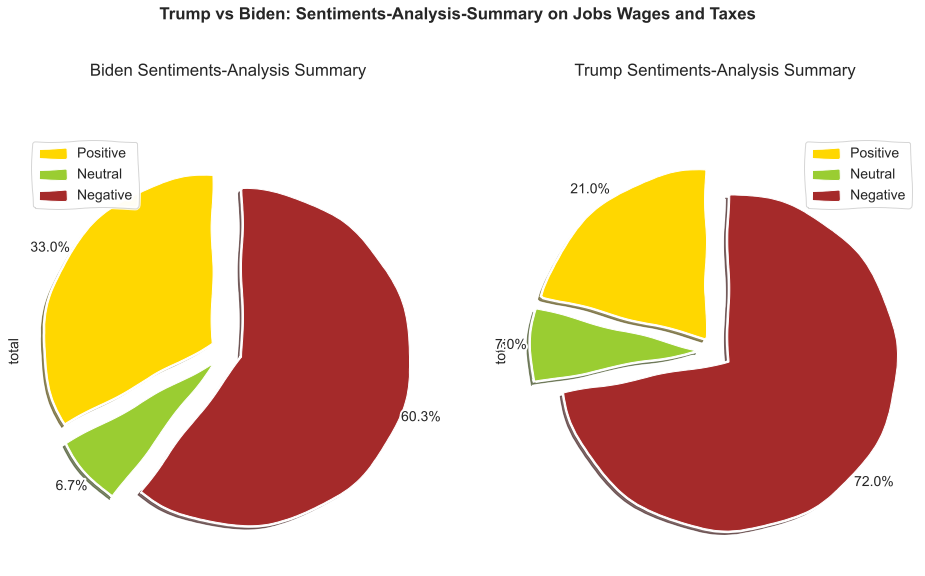

In [57]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'Jobs Wages and Taxes'

plot_sentiments(biden_jobs_sentiments, trump_jobs_sentiments, title, colours)

**Plotting the Jobs and Wages Key-phrases word-cloud object**

Joe Biden Jobs-and-Wages word-cloud...

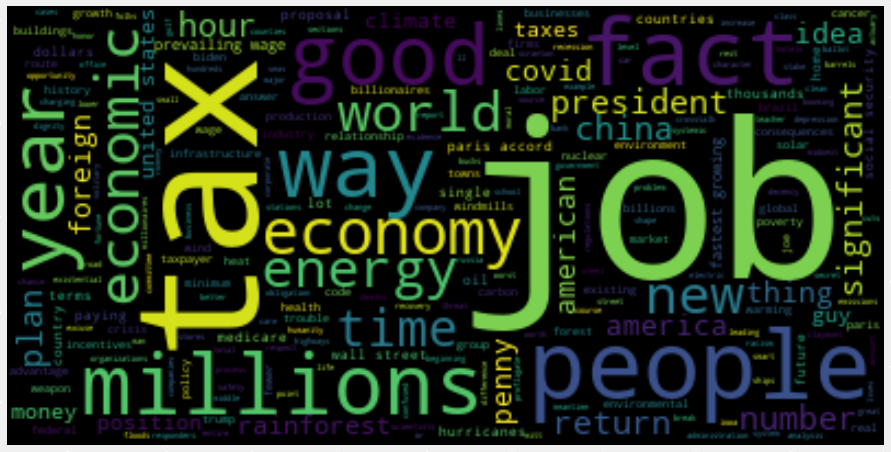

In [58]:
word_list = biden_jobs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'black'
plot_word_cloud(word_list, color)

Donald Trump Jobs-and-Wages word-cloud...

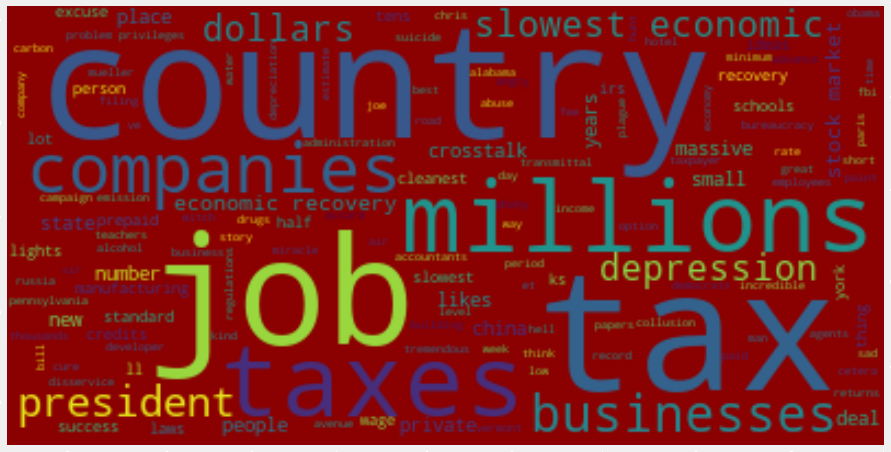

In [59]:
word_list = trump_jobs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

**Plotting the Jobs and Wages Point-Of-Speech-Tags bubble-plot object**

Let's define a method to normalize the data we shall use for the bubble-plot

In [60]:
def normalize_df(DataFrame):
    """Applies the min-max normalizer to
        each col of the data-frame to be 
        used for the bubble-plot
    """
    col_list = list(DataFrame.columns)
    
    for col in col_list:
        mini = min(DataFrame[col])
        maxi = max(DataFrame[col])
        DataFrame[col] = (DataFrame[col] - mini) / (maxi - mini)
        
    return DataFrame

Much of Data Science is about preparing data for each pipeline or library that requires the data in a specific way. So let's prepare the data we need to plot the bubble-plot.

In [61]:
def prepare_plot_bubble(trump_query_df, biden_query_df):
    """This method prepares the dataframes of
         Trump and Biden in preparation of the bubble plot,
         
         A bubble plot requires data in a specific format and
         chances are that both trump and Biden's DataFrames will 
         not be same size. This will cause issues in plotting. 
         So we must equalise and standardize the dataFrames.
        
        @param trump_query_df: A DataFrame of Trump's responses
        @param biden_query_df: A DataFrame of Biden's responses
        @return: A DataFrame prepared for the bubble-plot
    """
     
    
    trump_pos = parts_of_speech_tagging(trump_query_df)
    biden_pos = parts_of_speech_tagging(biden_query_df)
    
    if len(trump_pos) <= len(biden_pos):
        x, y = biden_pos.copy(), trump_pos.copy()
        col = ['Biden','Trump']
    else:
        x , y = trump_pos.copy(), biden_pos.copy()
        col = ['Trump','Biden']
        
        
    index = list(x.keys())
    columns = col
    
    xx = list(x.values())
    yy = [0] * len(xx)
    
    bubble_df = pd.DataFrame(columns=columns, index=index)
    bubble_df.iloc[:,0], bubble_df.iloc[:,1] = xx, yy
    
    for ind, row in bubble_df.iterrows():
        if ind not in y.keys():
            continue
        row[1] = y[ind]
        
    if 'PUNCT' in bubble_df.index:
        bubble_df = bubble_df.drop('PUNCT') 
        
    bubble_df = normalize_df(bubble_df)
    
    return bubble_df

Next, we define a method that plots the bubble_plot

In [62]:
def plot_bubble_plot(trump_query_df, biden_query_df, title):
    """This method plots a bubble-plot for Trump and Biden's responses
        
        @param trump_query_df: A dictionary of Trump's query responses
        @param biden_query_df: A dictionary of Biden's query responses
        @param title: The query title
        @return: None (just plots the bubble-plot)
    """
    
    bubble_df = prepare_plot_bubble(trump_query_df, biden_query_df)
    bubble_df['temp'] = list(range(1,len(bubble_df)+1))
    names_ = list(bubble_df.columns)

    #plt.rcdefaults()  # to stop xkcd plots
    ax0 = bubble_df.plot(kind='scatter',
                        x= names_[2],
                        y=names_[0],
                        figsize=(8, 4),
                        alpha=0.5,                  # transparency
                        color='red',
                        s=bubble_df[names_[0]] * 2000 + 10)  # pass in weights



    ax1 = bubble_df.plot(kind='scatter',
                         color='skyblue',
                         x=names_[2],
                         y=names_[1],
                         alpha= 0.5,
                         s= bubble_df[names_[1]] * 2000 + 10,
                         ax = ax0)

    ax0.set_ylabel('Value of POS-Tags', fontsize=10)
    ax0.set_title(f'Trump vs Biden: {title} POS-Tags Bubble-Plot')
    ax0.legend([names_[0], names_[1]], loc='upper right', fontsize='x-large')
    ax0.set_xlabel('POS-Tags')
    new_x_label = list(bubble_df.index)
    new_x_label.insert(0,'')
    new_x_label.append('')
    ax0.set_xticklabels(new_x_label, fontsize=10)
    
    plt.show()

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


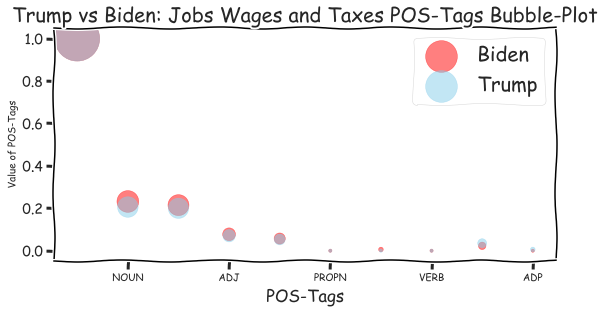

In [63]:
sns.set_style('ticks')
plt.xkcd()
title = 'Jobs Wages and Taxes'
plot_bubble_plot(trump_jobs_df, biden_jobs_df, title)

<h3>QUEST 2:Trump and Biden sentiments and key phrases on Racism</h3>

For Trump on Racism...

In [64]:
word_list = [' raci', 'race']  # This shoud cover racism, racial, racist and race
corpus = trump_total_raw_corpus

trump_racism_df, trump_racism_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [65]:
len(trump_racism_df)

47

In [66]:
trump_racism_df[:20]

Sentence Sentiment  \
0   if we would’ve listened to you, the country wo...  negative   
1                                 it’s china’s fault.  negative   
2                      it should have never happened.   neutral   
3   they stopped it from going in, but it was chin...  negative   
4   and, by the way, when you talk about numbers, ...  negative   
5      you don’t know how many people died in russia.  negative   
6       you don’t know how many people died in india.  negative   
7   they don’t exactly give you a straight count, ...   neutral   
8   but if you look at what we’ve done, i closed i...   neutral   
9   he’s a racist and he’s xenophobic,” because yo...  negative   
10      wait a minute.i ended it because it’s racist.  negative   
11  i ended it because a lot of people were compla...  negative   
12  that it a radical revolution that was taking p...   neutral   
13       and you know it, and so does everybody else.   neutral   
14  and he would know it- [crosstalk 00:33:02]if y...  negative   
15                         it was sort of a reversal.   neutral   
16  and if you look at the people, we were paying ...  negative   
17  and really, they were teaching people to hate ...  negative   
18             i’m not going to allow that to happen.   neutral   
19  we have to go back to the core values of this ...   neutral   

                                          Key-phrases  
0                 millions of people, country, person  
1                                     [china’s fault]  
2                                                  []  
3                                     [china’s fault]  
4                       [way, numbers, people, china]  
5                                    [people, russia]  
6                                     [people, india]  
7                                    [straight count]  
8                                                  []  
9                                           [country]  
10                                           [minute]  
11                            [lot of people, things]  
12     [place, radical revolution, military, schools]  
13                                                 []  
14          [status, certain person, life, crosstalk]  
15                                   [sort, reversal]  
16  [bad ideas, sick ideas, people hundreds of tho...  
17                             [people, country, i’m]  
18                                              [i’m]  
19                             [core values, country]

In [67]:
trump_racism_sentiments

{'Positive': [0.1], 'Neutral': [0.03], 'Negative': [0.87]}

Let's see some positive sentiments responses from Trump on Racism

In [68]:
count = 0
for index, row in trump_racism_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

as far as my relationships with all people, i think i have great relationships with all people.

they started from the day i won, and even before i won.



Let's see some negative sentiments responses from Trump on Racism

In [69]:
count = 0
for index, row in trump_racism_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

if we would’ve listened to you, the country would have been left wide open, millions of people would have died, not 200,000. and one person is too much.

it’s china’s fault.

they stopped it from going in, but it was china’s fault.

and, by the way, when you talk about numbers, you don’t know how many people died in china.

you don’t know how many people died in russia.

you don’t know how many people died in india.

he’s a racist and he’s xenophobic,” because you didn’t think i should have closed our country.

wait a minute.i ended it because it’s racist.

i ended it because a lot of people were complaining that they were asked to do things that were absolutely insane.

and he would know it- [crosstalk 00:33:02]if you were a certain person, you had no status in life.

and if you look at the people, we were paying people hundreds of thousands of dollars to teach very bad ideas and frankly, very sick ideas.

and really, they were teaching people to hate our country and i’m not going to 

For Biden on Racism...

In [70]:
word_list = [' raci', 'race']
corpus = biden_total_raw_corpus

biden_racism_df, biden_racism_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [71]:
len(biden_racism_df)

89

In [72]:
biden_racism_df.head(20)

Sentence Sentiment  \
0   … second point i’d make to you, is that when f...  negative   
1                                     what did he do?   neutral   
2   he came out of his bunker, had the military us...  negative   
3                  and then what happened after that?   neutral   
4   the bishop of that very church said that it wa...  negative   
5   the general who was with him said all he ever ...  negative   
6   this is a president who has used everything as...  negative   
7   he’s the racist.the fact is that there is raci...  negative   
8   people have to be made aware of what other peo...  negative   
9                         it’s important people know.   neutral   
10  many people don’t want to hurt other people’s ...  positive   
11  it makes a gigantic difference in the way a ch...  positive   
12  it’s a little bit like how this guy and his fr...   neutral   
13  they look down their nose on people like irish...   neutral   
14     they look down on people who don’t have money.  negative   
15  they look down on people who are of a differen...  positive   
16  they looked down on people who are a different...   neutral   
17                      in fact, we’re all americans.   neutral   
18  the only way we’re going to bring this country...  positive   
19  there’s nothing we cannot do, if we do it toge...   neutral   

                                          Key-phrases  
0   floyd, peaceful protest, white house, point i’...  
1                                                  []  
2      [military use tear gas, bunker, church, bible]  
3                                                  []  
4                          [church, bishop, disgrace]  
5                                   [people, general]  
6   [racists hatred, racist division, dog whistle,...  
7                        [fact, racial insensitivity]  
8                                            [people]  
9                                  [important people]  
10                [people’s feelings, big difference]  
11  [way, child, gigantic difference, sense of sel...  
12                             [guy, friends, people]  
13          [nose, people, irish catholics, scranton]  
14                                    [people, money]  
15                          [people, different faith]  
16                          [people, different color]  
17                                  [fact, americans]  
18                                     [way, country]  
19                                                 []

In [73]:
biden_racism_sentiments

{'Positive': [0.275], 'Neutral': [0.055], 'Negative': [0.67]}

Let's see some Biden's positive sentiments response on Racism.

In [74]:
count = 0
for index, row in biden_racism_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

many people don’t want to hurt other people’s feelings, but it makes a big difference.

it makes a gigantic difference in the way a child is able to grow up and have a sense of self-esteem.

they look down on people who are of a different faith.

the only way we’re going to bring this country together is bring everybody together.

we have to provide for economic opportunity, better education, better healthcare, better access to schooling, better access to opportunity to borrow money to start businesses, all the things we can do.

at the same time, we can make sure that our economy is being run and moved and motivated by clean energy, creating millions of new jobs.

he said, “there were very fine people on both sides.” no president’s ever said anything like that.

we ought to be able to safely open, but they need resources to open?

and that is not inconsistent with saying that we’re going to make sure that we’re going to open safely.

so don’t worry about it.

and what’s he do?

you pl

Let's see some of Biden's Negative sentiments responses on Racism

In [75]:
count = 0
for index, row in biden_racism_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

… second point i’d make to you, is that when floyd was killed, when mr. floyd was killed, there was a peaceful protest in front of the white house.

he came out of his bunker, had the military use tear gas on them so he could walk across to a church and hold up a bible.

the bishop of that very church said that it was a disgrace.

the general who was with him said all he ever wants to do is divide people, not unite people at all.

this is a president who has used everything as a dog whistle, to try to generate racists hatred, racist division.nobody’s doing that.

he’s the racist.the fact is that there is racial insensitivity.

people have to be made aware of what other people feel like, what insults them, what is demeaning to them.

they look down on people who don’t have money.

we can take this on and we can defeat racism in american.i was raised in the suburbs.

this is not 1950. all these dog whistles and racism don’t work anymore.

there’s many people today driving their kids to s

Let's see the sentiments analysis plot for racism

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

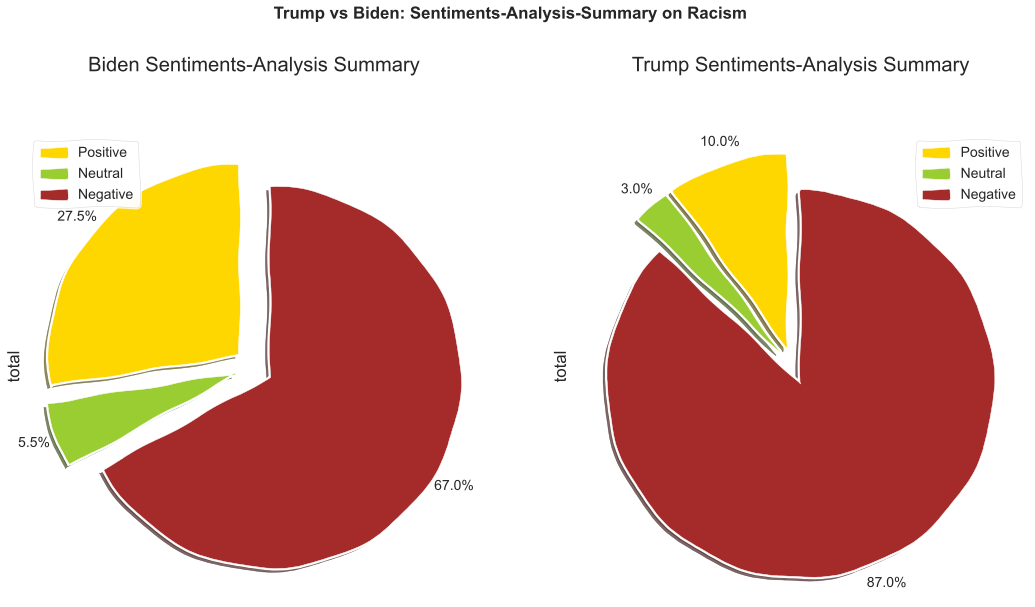

In [76]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'Racism'
plt.xkcd()

plot_sentiments(biden_racism_sentiments, trump_racism_sentiments, title, colours)

Let's see Joe Biden's racism word-cloud of Key-Phrases he used in addressing racism...

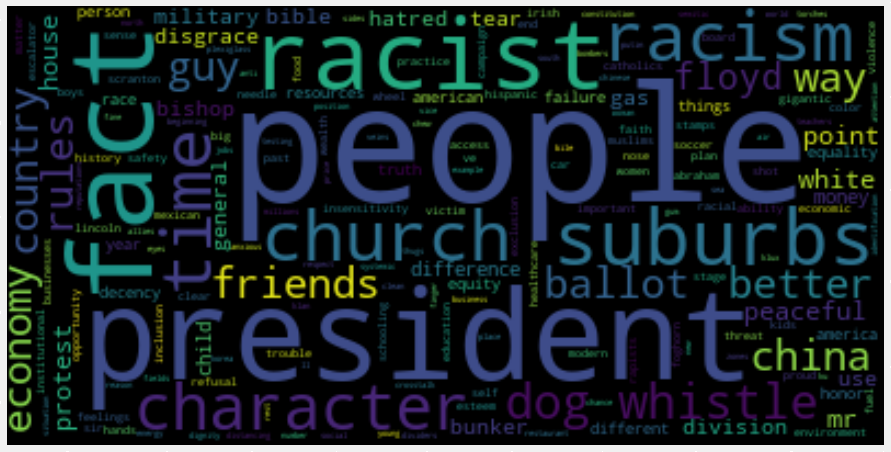

In [77]:
word_list = biden_racism_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'black'
plot_word_cloud(word_list, color)

And for trump...

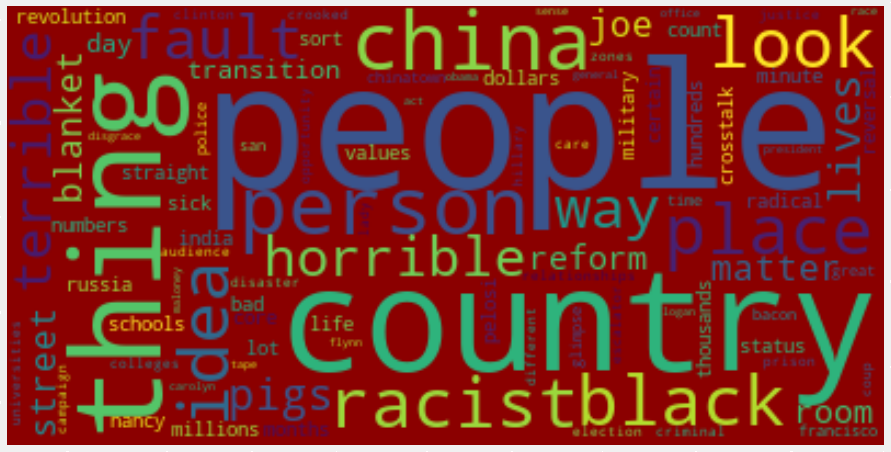

In [78]:
word_list = trump_racism_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

Let's finally plot the bubble plot for racism POS-Tags...

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


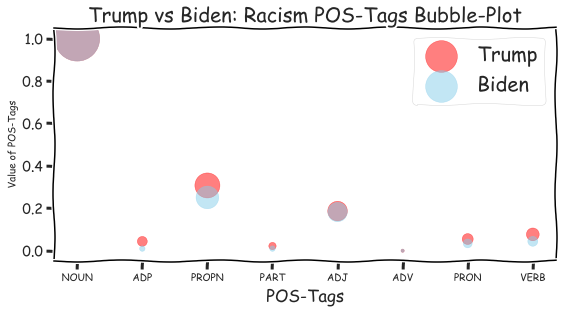

In [79]:
sns.set_style('ticks')
plt.xkcd()
title = 'Racism'
plot_bubble_plot(trump_racism_df, biden_racism_df, title)

<h3>QUEST 3:Trump and Biden sentiments and key phrases on the Economy</h3>

For trump on the Economy

In [80]:
word_list = ['economy']
corpus = trump_total_raw_corpus

trump_econs_df, trump_econs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [81]:
len(trump_econs_df)

44

In [82]:
trump_econs_df.head(20)

Sentence Sentiment  \
0                let me just tell you something, joe.   neutral   
1   if you would have had the charge of what i was...  positive   
2   and by the way, now it’s being built again and...  positive   
3      we closed it down because of the china plague.  negative   
4   when the plague came in, we closed it down, wh...  negative   
5   he didn’t think we should close it down and he...  negative   
6   again, two million people would be dead now in...  negative   
7                             one person is too much.  negative   
8              should have never happened from china.   neutral   
9   but what happened is we closed it down and now...   neutral   
10  we had 10.4 million people in a four month per...   neutral   
11  that’s a record the likes of which nobody’s ev...  positive   
12  and he wants to close down the… he will shut i...   neutral   
13  he will destroy this country.our economy boome...  negative   
14  and that’s despite the impeachment hoax and yo...  negative   
15  but despite going through all of these things ...  negative   
16  the greatest, before covid came in the greates...  positive   
17  everything was going.so as you know, 2.2 milli...  negative   
18  we closed up the greatest economy in the world...  negative   
19                         it’s a worldwide pandemic.   neutral   

                                          Key-phrases  
0                                                 joe  
1        [greatest economy, history, country, charge]  
2                    [greatest economy, history, way]  
3                                      [china plague]  
4                                            [plague]  
5                                                  []  
6                                            [people]  
7                                            [person]  
8                                             [china]  
9                                   [record business]  
10                  [people, month period, workforce]  
11                                    [record, likes]  
12                                                 []  
13  [period, president, i’ve, half years, administ...  
14           [impeachment hoax, hillary clinton, job]  
15      [fight, things, flanks, administration, i’ve]  
16  [greatest economy, lowest unemployment numbers...  
17                                           [people]  
18  [order, world, horrible disease, greatest econ...  
19                               [worldwide pandemic]

In [83]:
trump_econs_sentiments

{'Positive': [0.16], 'Neutral': [0.04], 'Negative': [0.8]}

Let's see some of Trumps positive sentiments responses on the Economy

In [84]:
count = 0
for index, row in trump_econs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

if you would have had the charge of what i was put through, i had to close the greatest economy of the history of our country.

and by the way, now it’s being built again and it’s going up fast.so we built the greatest economy in history.

that’s a record the likes of which nobody’s ever seen before.

the greatest, before covid came in the greatest economy in history, lowest unemployment numbers, everything was good.



Let's see some Trump negative sentiments on the Economy

In [85]:
count = 0
for index, row in trump_econs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

we closed it down because of the china plague.

when the plague came in, we closed it down, which was very hard psychologically to do.

he didn’t think we should close it down and he was wrong.

again, two million people would be dead now instead of… still, 204,000 people is too much.

one person is too much.

he will destroy this country.our economy boomed like it’s never boomed before.because there is never been an administration or president who has done more than i’ve done in a period of three and a half years.

and that’s despite the impeachment hoax and you so what happened today with hillary clinton, where it was a whole big con job.

but despite going through all of these things where i had a fight, both flanks and behind me and above there has never been an administration that’s done what i’ve done.

everything was going.so as you know, 2.2 million people modeled out, were expected to die.

we closed up the greatest economy in the world in order to fight this horrible disease 

For Biden on Economy...

In [86]:
word_list = ['economy']
corpus = biden_total_raw_corpus

biden_econs_df, biden_econs_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [87]:
len(biden_econs_df)

56

In [88]:
biden_econs_df.head(20)

Sentence Sentiment  \
0   and there was no one … we didn’t shut down the...   neutral   
1                   this is his economy he shut down.   neutral   
2   the reason it’s shut down is because, look, yo...   neutral   
3   how many of you got up this morning and had an...  negative   
4   how many of you are in a situation where you l...  negative   
5   those people who have been saving our lives, t...  positive   
6   people who’ve been putting themselves in the w...   neutral   
7   and the idea that he is insisting that we go f...  negative   
8                       why is he want to open it up?   neutral   
9   why does he take care of the… you can’t fix th...  negative   
10  and he has no intention of doing anything abou...  negative   
11                      i was asked to bring it back.   neutral   
12  we were able to have an economic recovery that...   neutral   
13  we handed him a booming economy, he blew it.un...  negative   
14  when i was vice president, we inherited a rece...   neutral   
15                             i was asked to fix it.  positive   
16                                             i did.   neutral   
17  we left him a booming economy and he caused th...   neutral   
18  with regard to being weaker, the fact is that ...  negative   
19                                he’s putin’s puppy.   neutral   

                                          Key-phrases  
0                                             economy  
1                                           [economy]  
2                               [folks, home, reason]  
3              [chair, kitchen table, covid, morning]  
4   [people, mom, phone, fact, goodbye, jobs, situ...  
5                                     [people, lives]  
6                                       [way, people]  
7   [covid cases, covid deaths, united states of a...  
8                                                  []  
9                       [economy, covid crisis, care]  
10  [depression, worst recession, health, american...  
11                                                 []  
12                          [economic recovery, jobs]  
13                       [president, booming economy]  
14                        [vice president, recession]  
15                                                 []  
16                                                 []  
17                       [booming economy, recession]  
18           [head, i’ve, fact, putin, regard, stuff]  
19                                    [putin’s puppy]

In [89]:
biden_econs_sentiments

{'Positive': [0.45], 'Neutral': [0.05], 'Negative': [0.5]}

let's see some of Bidens positive sentiments responses on the Econony

In [90]:
count = 0
for index, row in biden_econs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

those people who have been saving our lives, those people who have been out there dying.

i was asked to fix it.

number two, if in fact, during our administration in the recovery act, i was in charge able to bring down the cost of renewable energy to cheaper than are as cheap as coal and gas and oil.

they’re going to move to renewable energy.

there’s so many things that we can do…the fact is, it’s going to create millions of good paying jobs, and these tax incentives for people to weatherize, which he wants to get rid of.

it’s going to make the economy much safer.

and what’s he do?

so they don’t leak as much energy saving hundreds of millions of barrels of oil in the process and creating significant number of jobs.

by the way, the whole idea of what this is all going to do, it’s going to create millions of jobs and it’s going to clean the environment.

this is from wall street and i’ll create $1 trillion more in economic growth than his proposal does.

at the same time, we can m

Now, let's see some of Biden's negative sentiments responses on the Economy

In [91]:
count = 0
for index, row in biden_econs_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

how many of you got up this morning and had an empty chair at the kitchen table because someone died of covid?

how many of you are in a situation where you lost your mom or dad and you couldn’t even speak to them, you had a nurse holding a phone up so you could in fact say goodbye?secondly, the people who have lost their jobs are those people who have been on the front lines.

and the idea that he is insisting that we go forward and open when you have almost half the states in america with a significant increase in covid deaths and covid cases in the united states of america, and he wants to open it up more.

why does he take care of the… you can’t fix the economy until you fix the covid crisis.

and he has no intention of doing anything about making it better for you all at home in terms of your health and your safety.the economy-… we inherited the worst recession, short of a depression in american history.

we handed him a booming economy, he blew it.under this president, we become 

Let's see the sentiments analysis plot for Economy...

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

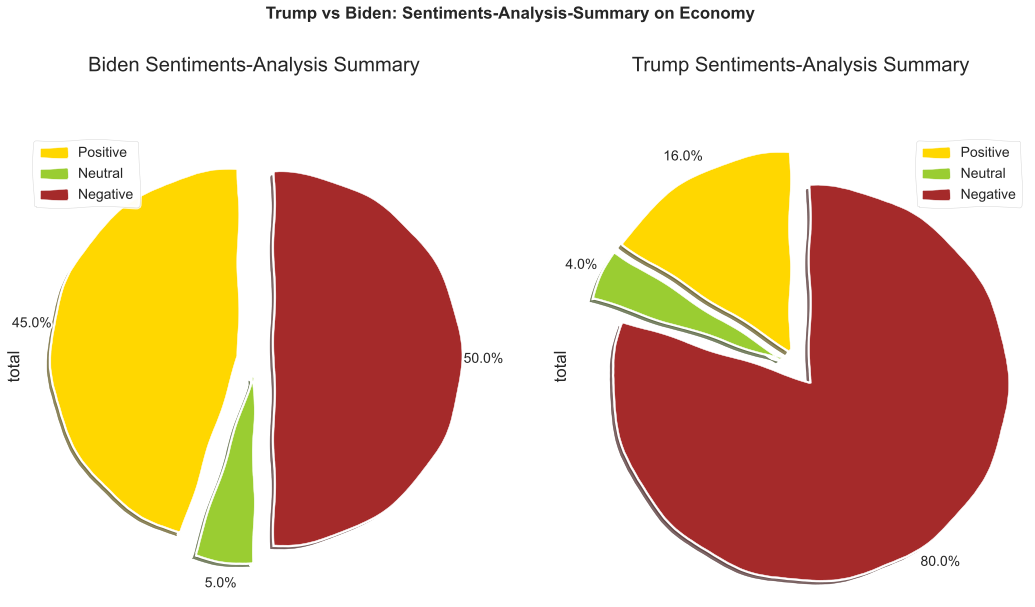

In [92]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'Economy'
plt.xkcd()

plot_sentiments(biden_econs_sentiments, trump_econs_sentiments, title, colours)

Let's see Joe Bidens word-cloud of Key-Phrases he used when addressing the US Economy

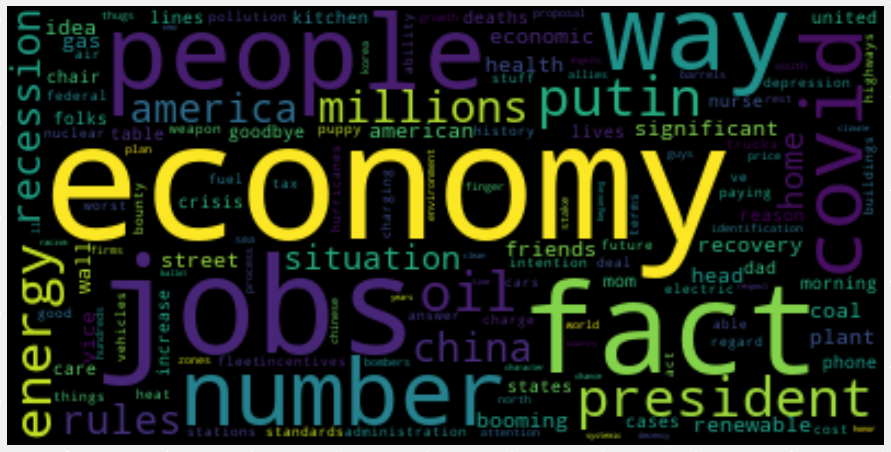

In [93]:
word_list = biden_econs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'black'
plot_word_cloud(word_list, color)

And for Trump on the Economy...

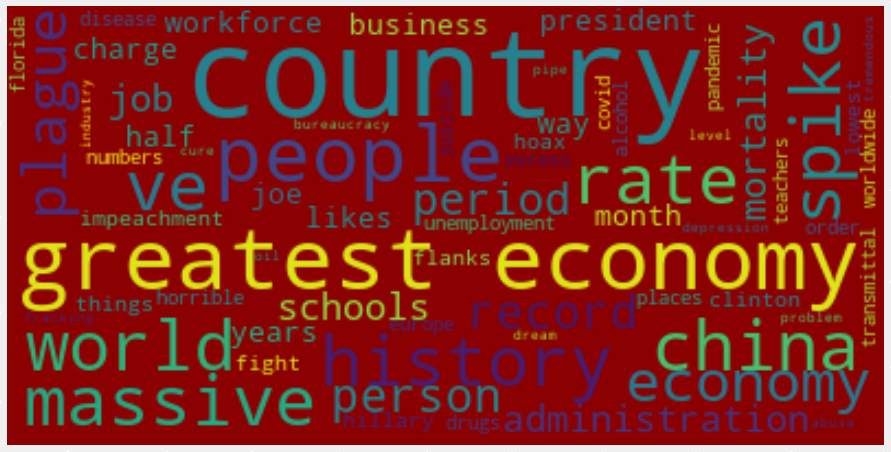

In [94]:
word_list = trump_econs_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

Finally, let's see the distribution of Parts-Of-Speech tags as both Trump and Biden address the Economy...

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


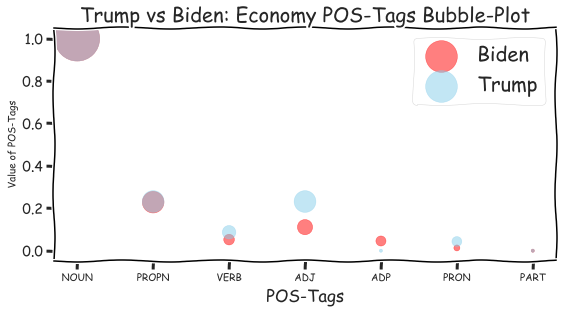

In [95]:
sns.set_style('ticks')
plt.xkcd()
title = 'Economy'
plot_bubble_plot(trump_econs_df, biden_econs_df, title)

<h3>QUEST 4:Trump and Biden sentiments and key phrases on COVID19 and Health.</h3>

For Trump on COVID19 and Health-Care

In [96]:
word_list = ['drug','covid', 'pandemic','vaccine', 'virus', 'health', 'care',' dr',' doc']
corpus = trump_total_raw_corpus

trump_covid_df, trump_covid_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [97]:
len(trump_covid_df)

383

In [98]:
trump_covid_df.head(20)

Sentence Sentiment  \
0   well, first of all, i guess i’m debating you, ...   neutral   
1                                  i’m not surprised.   neutral   
2                     let me just tell you something.   neutral   
3                           there’s nothing symbolic.   neutral   
4                            i’m cutting drug prices.   neutral   
5   i’m going with favored nations, which no presi...  negative   
6          drug prices will be coming down 80 or 90%.   neutral   
7   you could have done it during your 47 year per...   neutral   
8                                   nobody’s done it.   neutral   
9   so we’re cutting healthcare.i’ll give you an e...   neutral   
10  insulin, it was destroying families, destroyin...  negative   
11  i’m getting it for so cheap it’s like water, y...   neutral   
12                                          so cheap.  negative   
13  take a look at all of the drugs that what we’r...  positive   
14  prescription drug prices, we’re going to allow...  negative   
15  and i’m telling you it’s because they don’t wa...   neutral   
16  one of them came out last week, you saw that, ...  negative   
17                   because it’s after the election.   neutral   
18  they think they’re hurting us by keeping them ...  negative   
19                            they’re hurting people.  negative   

                                          Key-phrases  
0                                           guess i’m  
1                                               [i’m]  
2                                                  []  
3                                                  []  
4                                  [i’m, drug prices]  
5   [president, favored nations, i’m, big pharma, ...  
6                                       [drug prices]  
7                           [year period, government]  
8                                                  []  
9                         [healthcare, i’ll, example]  
10                  [families, people, cost, insulin]  
11                                [water, i’m, truth]  
12                                                 []  
13                                      [look, drugs]  
14  [drugs, states, alcohol, lot of people, prescr...  
15                                              [i’m]  
16                                             [week]  
17                                         [election]  
18                                                 []  
19                                           [people]

In [99]:
trump_covid_sentiments

{'Positive': [0.38], 'Neutral': [0.048], 'Negative': [0.572]}

Let's see some of trump's positive sentiments responses on COVID

In [100]:
count = 0
for index, row in trump_covid_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

take a look at all of the drugs that what we’re doing.

people know what to do.

our country is coming back incredibly well, setting records as it does it.

the greatest, before covid came in the greatest economy in history, lowest unemployment numbers, everything was good.

we were going to take care of everything for them.

and i’d love to do that.

i’d love to help them.

this was a way of taking care of them.

economically, we saved it and i saved it again a number of months ago, when oil was crashing because of the pandemic.

by my doing it early, in fact, dr. fauci said, “president trump saved thousands of lives.” many of your democrat governors said, “president trump did a phenomenal job.” we worked with the governor.

the governors said i did a phenomenal job.

in fact, people that would not be necessarily on my side said that, “president trump did a phenomenal job.” we did.

we’ve done a great job.you’ll have the vaccine sooner than that.… they will have the vaccine very soon.

And for the negatives for Trump on Covid

In [101]:
count = 0
for index, row in trump_covid_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

i’m going with favored nations, which no president has the courage to do because you’re going against big pharma.

insulin, it was destroying families, destroying people, the cost.

so cheap.

prescription drug prices, we’re going to allow our governors now to go to other countries to buy drugs because when they paid just a tiny fraction of what we do.a lot of people, between drugs and alcohol and depression, when you start shutting it down, you take a look at what’s happening at some of your democrat-run states where they have these tough shutdowns.

one of them came out last week, you saw that, “oh, we’re going to open up on november 9th.” why november 9th?

they think they’re hurting us by keeping them closed.

they’re hurting people.

they can do whatever they want, but they got to open these states up.when you look at north carolina, when you look, and these governors are under siege, pennsylvania, michigan, and a couple of others, you got to open these states up.

it’s not fair.


For Biden on COVID19...

In [102]:
corpus = biden_total_raw_corpus

biden_covid_df, biden_covid_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [103]:
len(biden_covid_df)

474

In [104]:
biden_covid_df.tail(20)

Sentence Sentiment  \
454  over 20,000 of them are first responders out t...  negative   
455                                       we owe them.   neutral   
456  we owe them.we commuted over 1,000 people’s se...   neutral   
457  and secondly, we’re in a situation here where ...  negative   
458  and one of those things we should be doing, th...   neutral   
459  that’s why i’m offering $20 billion to states ...   neutral   
460  no one should be going to jail because they ha...  negative   
461  they should be going to rehabilitation, not to...   neutral   
462  we should fundamentally change the system and ...  negative   
463  i’ve been trying to change since then particul...   neutral   
464  that’s why i’ve been arguing that in fact we s...  negative   
465  and that’s why i set up drug courts which were...  negative   
466  they should not be going to jail for a drug or...  negative   
467  that’s what we’ve been trying to do, that’s wh...  negative   
468  when my mom get in the car and when there are ...   neutral   
469  that’s why so many people in my state were dyi...  negative   
470  the fact is those frontline communities, it’s ...   neutral   
471                 it matters how you keep them safe.  positive   
472                                    what do you do?   neutral   
473  you impose restrictions on the pollutions that...   neutral   

                                           Key-phrases  
454               [care of people, responders, crisis]  
455                                                 []  
456      [law, fact, barack obama, people’s sentences]  
457  [federal prison system, people, situation, adm...  
458                 [minimum mandatories, law, things]  
459  [minimum mandatories, state laws, drug courts,...  
460                                     [drug problem]  
461                                   [rehabilitation]  
462  [drugs, senators, i’m, percent, bill, system, ...  
463                           [portion, cocaine, i’ve]  
464  [pure drug offense, i’ve, fact, treatment, boa...  
465                  [drug courts, republican friends]  
466                 [drug, alcohol problem, treatment]  
467  [delaware river, marcus hook, oil refineries, ...  
468  [oil slick, windshield wiper, school, car, fro...  
469                            [state, people, cancer]  
470              [frontline communities, fact, matter]  
471                                                 []  
472                                                 []  
473  [pollutants, fence line communities, pollution...

In [105]:
biden_covid_sentiments

{'Positive': [0.321], 'Neutral': [0.055], 'Negative': [0.624]}

Let's see some positive sentiments response for Biden on COVID

In [106]:
count = 0
for index, row in biden_covid_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

he’s been promising a healthcare plan since he got elected.

and i’m proud of him, i’m proud of my son.what i’m going to do is pass obamacare with a public option, and become bidencare.

they did not lose their insurance unless they chose they wanted to go to something else.my response is, people deserve to have affordable healthcare, period.

and the biden care proposal will in fact provide for that affordable healthcare, lower premiums.

you can buy into the better plans, the cheaper plans, lower your premiums, deal with unexpected billing, and have your drug prices drop significantly.

what does it mean for them going forward if you strike down the affordable care act?

good luck.

when he was presented with that number, he said, “it is what it is.” well, it is what it is because you are who you are.

he’s on tape as acknowledging he knew it.

you don’t panic.

but you folks at home, you folks living in scranton and claymont and all the small towns and working class towns in america

And for Biden's negative sentiments on COVID

In [107]:
count = 0
for index, row in biden_covid_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

he sends out wishful thinking.

he has executive orders that have no power.

[crosstalk 00:17:14].my son like a lot of people at home had a drug problem.

thirdly, the idea that i want to eliminate private insurance, the reason why i had such a fight with 20 candidates for the nomination was i support private insurance.

not one single person with private insurance would lose their insurance under my plan, nor did they under obamacare.

and secondly, we’re in a situation here where the federal prison system was reduced by 38,000 people under our administration.

no one should be going to jail because they have a drug problem.

we should fundamentally change the system and that’s what i’m going to do.one of the things is that in the ’80s we passed 100 percent, all 100 senators voted for a bill on drugs and how to deal with drugs, it was a mistake.

that’s why i’ve been arguing that in fact we should not send anyone to jail for a pure drug offense, they should be going into treatment acr

And the sentiments analysis plot for COVID

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

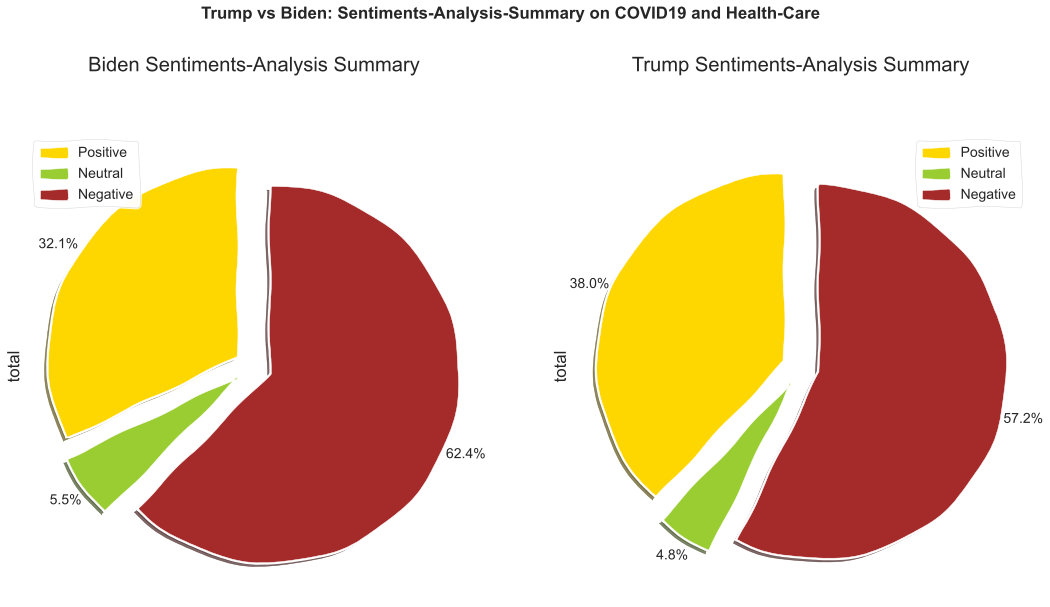

In [108]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'COVID19 and Health-Care'
plt.xkcd()
plot_sentiments(biden_covid_sentiments, trump_covid_sentiments, title, colours)

Let's see the word-cloud objects for Key-phrases spoken Trump as he addresses the Pandemic...

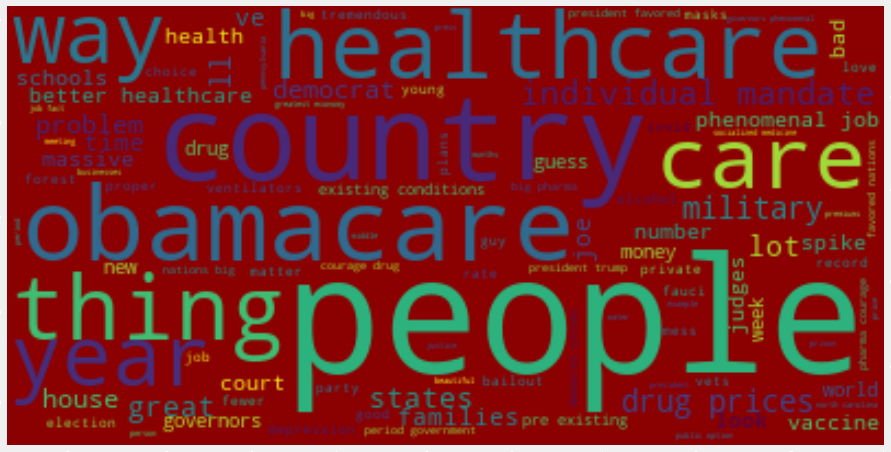

In [109]:
word_list = trump_covid_df['Key-phrases']
plt.style.use('fivethirtyeight')
color = 'darkred'
plot_word_cloud(word_list, color)

And for Biden's Key-phrases on COVID19...

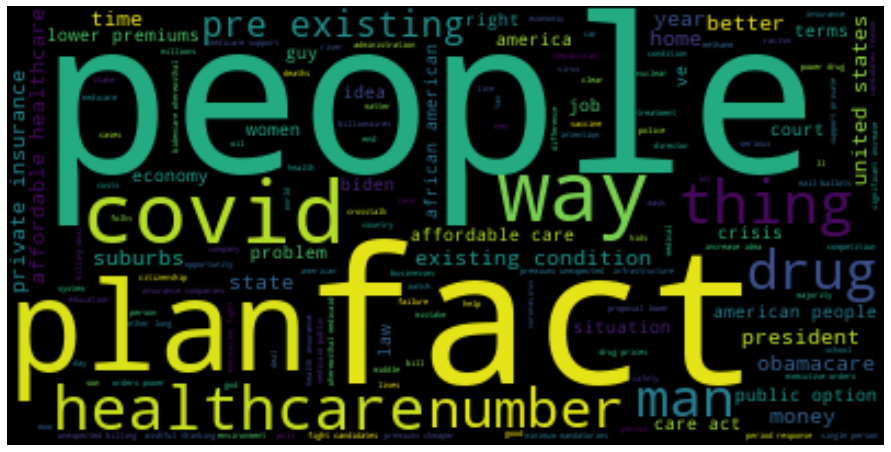

In [110]:
word_list = biden_covid_df['Key-phrases']
plt.style.use('seaborn')
color = 'black'
plot_word_cloud(word_list, color)

And now for the POS-Tags distribution

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


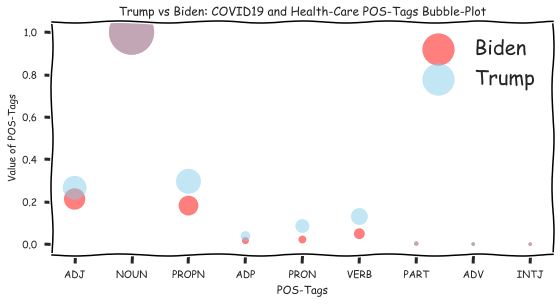

In [111]:
sns.set_style('ticks')
plt.xkcd()
title = 'COVID19 and Health-Care'
plot_bubble_plot(trump_covid_df, biden_covid_df, title)

<h3>QUEST 5:Trump and Biden sentiments and key phrases on the People of America...</h3>

For trump on the Residents and Citizens of America...

In [112]:
word_list = ['citizen', 'america', 'black', 'african', 'white', 'latin', 'hispanic', 'asian', 'minorit', 'immigra']
corpus = trump_total_raw_corpus

trump_people_df, trump_people_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [113]:
len(trump_people_df)

171

In [114]:
trump_people_df.head(20)

Sentence Sentiment  \
0   you did a crime bill, 1994, where you call the...  negative   
1   african-americans are super predators and they...   neutral   
2   they’ve never forgotten it.so you did that and...  negative   
3   you did the 1990… and that’s why, if you look ...  positive   
4   you call them super predators, and you’ve call...  negative   
5   because you look back at your testimony over t...  negative   
6   as far as the church is concerned and as far a...  positive   
7   law enforcement, almost every law enforcement ...   neutral   
8                                     i have florida.   neutral   
9                                       i have texas.   neutral   
10                                       i have ohio.   neutral   
11  i have every… excuse me, portland, the sheriff...  negative   
12  and every time you raise money deals are made,...   neutral   
13                  i could raise so much more money.   neutral   
14  as president, and as somebody that knows most ...   neutral   
15                    i would blow away every record.   neutral   
16  but i don’t want to do that because it puts me...  negative   
17                 and then you bring up wall street?   neutral   
18  you shouldn’t be bringing up wall street, beca...   neutral   
19  i could blow away your records like you wouldn...   neutral   

                                          Key-phrases  
0                         crime bill, super predators  
1                [african-americans, super predators]  
2   [black community, african-american population ...  
3                 [republican, i’m, long time, polls]  
4                                   [super predators]  
5                       [years, lot worse, testimony]  
6   [generals, total support, military leaders, ch...  
7              [law enforcement group, united states]  
8                                           [florida]  
9                                             [texas]  
10                                             [ohio]  
11  [lot of money, tremendous amounts of money, jo...  
12                           [money deals, time, joe]  
13                                            [money]  
14  [heads of wall street, company, people, americ...  
15                                           [record]  
16                                     [bad position]  
17                                      [wall street]  
18                               [wall street, money]  
19                                          [records]

In [115]:
trump_people_sentiments

{'Positive': [0.41], 'Neutral': [0.028], 'Negative': [0.562]}

Let's see some positive sentiments responses for Trump on The People of America

In [116]:
count = 0
for index, row in trump_people_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

you did the 1990… and that’s why, if you look at the polls, i’m doing better than any republican has done in a long time, because they saw what you did.

as far as the church is concerned and as far as the generals are concerned, we just got the support of 250 military leaders and generals, total support.

they took over the submarine port, you remember that very well, during your term, during you and barack obama.

and regardless of me, i think you have to clean it up and talk to the american people.

you did the 1990… and that’s why, if you look at the polls, i’m doing better than any republican has done in a long time, because they saw what you did.

as far as the church is concerned and as far as the generals are concerned, we just got the support of 250 military leaders and generals, total support.

i have every… excuse me, portland, the sheriff just came out today and he said, “i support president trump.”yes, i do.

he came in with this incredible idea for opportunity zones.

it’

And for the negative sentiments reaponses for Trump on the People of America

In [117]:
count = 0
for index, row in trump_people_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

you did a crime bill, 1994, where you call them super predators.

they’ve never forgotten it.so you did that and they call you a super predator and i’m letting people out of jail now, that you have treated the african-american population community, you have treated the black community about as bad as anybody in this country.

you call them super predators, and you’ve called them worse than that.

because you look back at your testimony over the years, you’ve called them a lot worse than that.

i have every… excuse me, portland, the sheriff just came out today and he said, “i support president trump.”joe, you have raised a lot of money, tremendous amounts of money.

but i don’t want to do that because it puts me in a bad position.

we don’t need money.

in fact, we beat hillary clinton with a tiny fraction of the money that she was able to [crosstalk 00:29:15]and i’ll tell you, they were so bad.

but now, with what came out today, it’s even worse.

all of the emails, the emails, the hor

For Biden on the People...

In [118]:
word_list = ['citizen', 'america', 'black', 'african', 'white', 'latin', 'hispanic', 'asian', 'minorit', 'immigra']
corpus = biden_total_raw_corpus

biden_people_df, biden_people_sentiments = apply_sentiments_and_extractions(word_list, corpus)

In [119]:
len(biden_people_df)

322

In [120]:
biden_people_df.head(20)

Sentence Sentiment  \
0                     because we made a mistake made.  negative   
1                   it took too long to get it right.  positive   
2                      took too long to get it right.  negative   
3   i’ll be president of the united states, not vi...   neutral   
4            and the fact is i’ve made it very clear.   neutral   
5   within a 100 days, i’m going to send to the un...   neutral   
6   and all of those so-called dreamers, those dac...   neutral   
7   the idea that they are being sent home by this...  negative   
8                                      i can imagine.   neutral   
9                              you’re five years old.   neutral   
10  your parents are taking across the rio grande ...  negative   
11                         and you say, “oh, no, mom.   neutral   
12                                     leave me here.   neutral   
13     i’m not going to go with you.” they been here.   neutral   
14                   many of them are model citizens.   neutral   
15  over 20,000 of them are first responders out t...  negative   
16                                       we owe them.   neutral   
17  we owe them.the american people have a right t...  positive   
18  they’re not going to get that chance now becau...   neutral   
19                  the election has already started.   neutral   

                                          Key-phrases  
0                                             mistake  
1                                                  []  
2                                                  []  
3               [united states, vice president, i’ll]  
4                                        [fact, i’ve]  
5   [citizenship, united states, pathway, i’m, und...  
6   [so-called dreamers, daca kids, country, path,...  
7                                   [home, idea, guy]  
8                                                  []  
9                                         [years old]  
10                        [rio grande river, parents]  
11                                              [mom]  
12                                                 []  
13                                              [i’m]  
14                                   [model citizens]  
15               [care of people, responders, crisis]  
16                                                 []  
17  [say, united states senators, president of uni...  
18                         [middle, chance, election]  
19                                         [election]

In [121]:
biden_people_sentiments

{'Positive': [0.187], 'Neutral': [0.039], 'Negative': [0.774]}

Let's see some of Biden's positive sentiments responses for the American People

In [122]:
count = 0
for index, row in biden_people_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'positive':
        print(row['Sentence'])
        print()
        count+=1

it took too long to get it right.

we owe them.the american people have a right to have a say in who the supreme court nominee is and that say occurs when they vote for united states senators and when they vote for the president of united states.

vote and let your senators know strongly how you feel.good luck.

when he was presented with that number, he said, “it is what it is.” well, it is what it is because you are who you are.

he’s on tape as acknowledging he knew it.

you don’t panic.

but you folks at home, you folks living in scranton and claymont and all the small towns and working class towns in america, how well are you doing?

those people who have been saving our lives, those people who have been out there dying.

come on.well, just take a look at what is the analysis done by wall street firms, points out that my economic plan would create 7 million more jobs than his in four years, number one.

and number two, it would create an additional $1 trillion in economic growth, 

And for Biden's negative sentiments responses on the People of America...

In [123]:
count = 0
for index, row in biden_people_df.iterrows():
    if count == 20:
        break
    if row['Sentiment'] == 'negative':
        print(row['Sentence'])
        print()
        count+=1

because we made a mistake made.

took too long to get it right.

the idea that they are being sent home by this guy and they want to do that is they’ve gone to they’ve never seen before.

your parents are taking across the rio grande river and it’s illegal.

over 20,000 of them are first responders out there taking care of people during this crisis.

we should wait and see what the outcome of this election is because that’s the only way the american people get to express their view is by who they elect as president and who they elect as vice president.it does not.

it’s only for those people who are so poor they qualify for medicaid they can get that free in most states, except governors who want to deny people who are poor medicaid.

200,000 dead.

as you said, over seven million infected in the united states.

we, in fact, have 4% of the world’s population, 20% of the deaths.

in addition to that, about between 750 and 1000 people a day are dying.

he knew all the way back in februar

c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_matplotlib\tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\programdata\miniconda3\lib\site-packages\pandas\plotting\_m

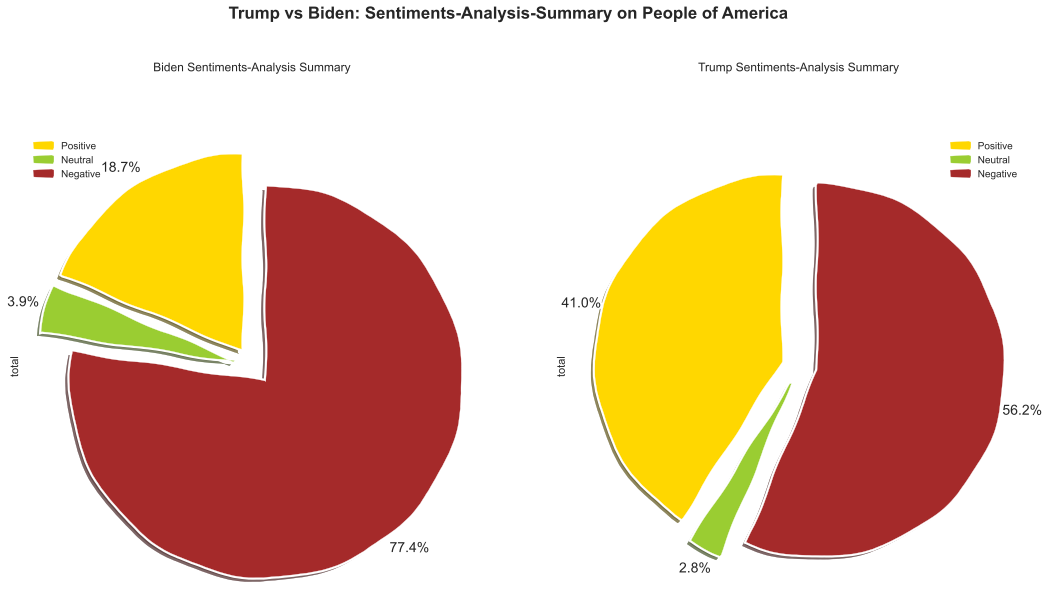

In [124]:
colours = ['gold', 'yellowgreen', 'brown']
title = 'People of America'
plot_sentiments(biden_people_sentiments, trump_people_sentiments, title, colours)

Let's see the Key-phrases for Trump...

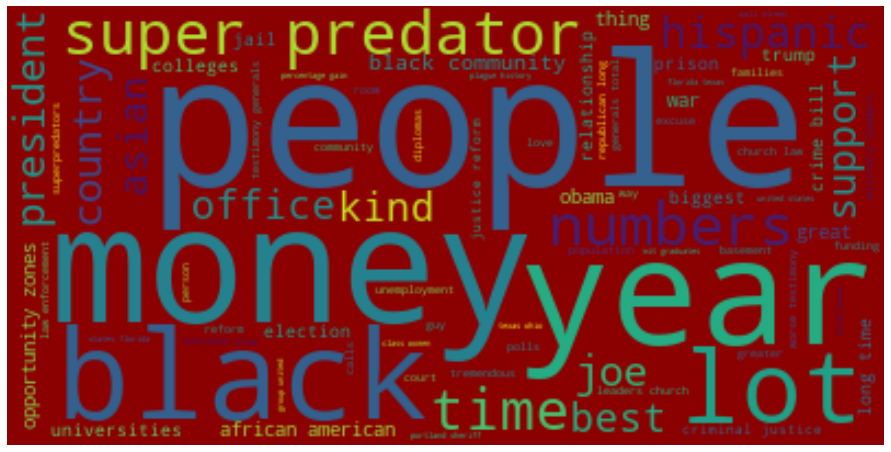

In [125]:
word_list = trump_people_df['Key-phrases']
plt.style.use('seaborn')
color = 'darkred'
plot_word_cloud(word_list, color)

And for Biden on the People...

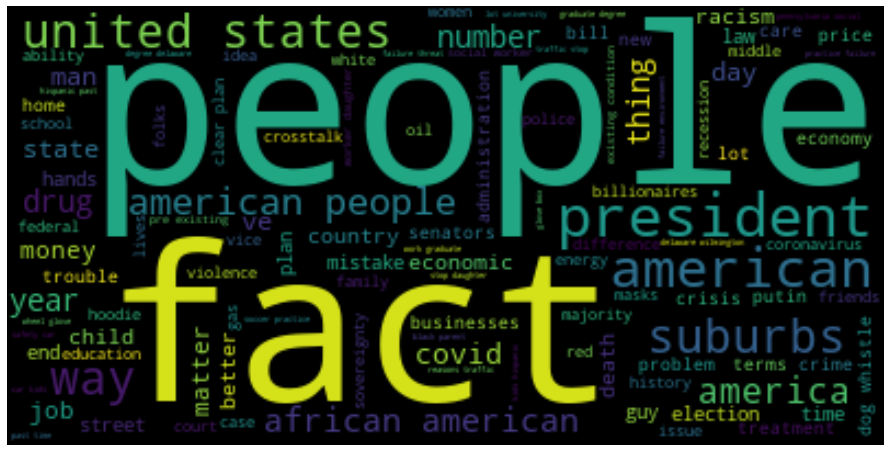

In [126]:
word_list = biden_people_df['Key-phrases']
plt.style.use('seaborn')
color = 'black'
plot_word_cloud(word_list, color)

Finally, let's see the POS-Tags distribution bubble-plot for Trump and Biden on the American People...

c:\programdata\miniconda3\lib\site-packages\ipykernel_launcher.py:40: UserWarning: FixedFormatter should only be used together with FixedLocator


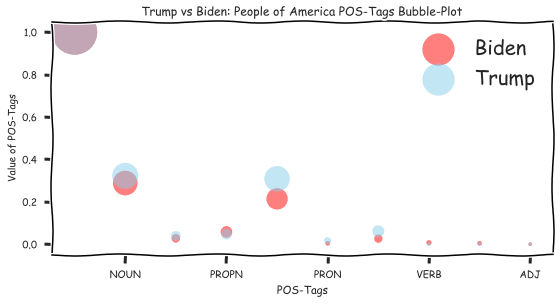

In [127]:
sns.set_style('ticks')
plt.xkcd()
title = 'People of America'
plot_bubble_plot(trump_people_df, biden_people_df, title)

<h2>Bayesian Inference on common search-queries for Trump and Biden</h2>

So, our task here is to find the conditional probability of Trump and Biden mentioning the words we care most about from the five questions word-list above.<br>
We will build a naive-bayes classifier from scratch and use it to tell the conditional likelihood of Trump and Biden given the words we care most about.

<h3>Bayes Theory Formula</h3>

<h3>$P(A|B)$ = ${P(B|A) * P(A)}\over{PB}$</h3>

Let's define the Prior. So what do we know, we know that both Trump and Biden had a 50-50 chance of participating at these debates. The venue, time and logistics were made to accommodate both Trump and Biden and they both were debating under the same set of normal circumstances, at the same time, place and date... Therefore<br>
$P$ of Trump speech for debates 1 and 2 = 0.5<br>
$P$ of Biden speech for debates 1 and 2 = 0.5<br>

In [128]:
p_trump_speech = 0.5
p_biden_speech = 0.5

print(f'P of Trump-Speech is {p_trump_speech}, P of Biden-Speech is {p_biden_speech}')
print(f'Sum of p-trump-speech and p-biden-speech is {p_trump_speech + p_biden_speech}.')

P of Trump-Speech is 0.5, P of Biden-Speech is 0.5
Sum of p-trump-speech and p-biden-speech is 1.0.


Therefore, we can see that both Trump and Biden have 50% chance each of participating at the debates.<br>
Now, let's process the word-list we care about. We get these from the 5 queries above.

In [129]:
words1 = ['job', 'wage', 'tax']
words2 = ['raci','race']
words3 = ['economy']
words4 = ['drugs','covid', 'pandemic','vaccine', 'virus', 'health', 'care','dr','doc']
words5 = ['citizen', 'america', 'black', 'african', 'white', 'latin', 'hispanic', 'asian', 'minorit', 'immigra']

Let's combine all these lists 

In [130]:
words = [words1, words2, words3, words4, words5]
query_list = []
for word in words:
    query_list.extend(word)
    
query_list

['job',
 'wage',
 'tax',
 'raci',
 'race',
 'economy',
 'drugs',
 'covid',
 'pandemic',
 'vaccine',
 'virus',
 'health',
 'care',
 'dr',
 'doc',
 'citizen',
 'america',
 'black',
 'african',
 'white',
 'latin',
 'hispanic',
 'asian',
 'minorit',
 'immigra']

Now let's find the Probability of Trump and Biden saying these words

In [131]:
def probability_queries(query_list, trump_total_words, biden_total_words):
    
    # First make all words lower-case
    trump_total_words = [i.lower() for i in trump_total_words]
    biden_total_words = [j.lower() for j in biden_total_words]
    
    # Next, initialise a DataFrame to store findings
    df = pd.DataFrame(index=query_list, columns=['P-Trump', 'P-Biden'])
    # Next fill the columns with zeros
    df['P-Trump'], df['P-Biden'] = 0, 0
    
    # Next use Counter() to get a dict of word:count pairs
    tokenized_trump_dict = dict(Counter(trump_total_words))
    tokenized_biden_dict = dict(Counter(biden_total_words))

    for word in query_list:
        # For Trump
        for key, val in tokenized_trump_dict.items():
            if word in key:
                if df.loc[word, 'P-Trump'] == 0:
                    df.loc[word, 'P-Trump'] = val
                else:
                    df.loc[word, 'P-Trump'] += val
                    
         # For Biden           
        for key, val in tokenized_biden_dict.items():
            if word in key:
                if df.loc[word, 'P-Biden'] == 0:
                    df.loc[word, 'P-Biden'] = val
                else:
                    df.loc[word, 'P-Biden'] += val
                    
    # now we compute the ratios for each query word for Trump and Biden   
    df['P-Trump'] /= sum(tokenized_trump_dict.values())
    df['P-Biden'] /= sum(tokenized_biden_dict.values())
    return df 

In [132]:
queries_df = probability_queries(query_list, trump_total_words, biden_total_words)

In [133]:
queries_df

P-Trump   P-Biden
job       0.002488  0.003906
wage      0.000216  0.000504
tax       0.001731  0.003654
raci      0.000757  0.001260
race      0.000216  0.000630
economy   0.000866  0.001764
drugs     0.000541  0.000378
covid     0.000325  0.001764
pandemic  0.000216  0.000000
vaccine   0.000757  0.000882
virus     0.000000  0.000630
health    0.001623  0.002520
care      0.004869  0.005292
dr        0.002921  0.003150
doc       0.000216  0.000126
citizen   0.000000  0.000378
america   0.000541  0.006678
black     0.001623  0.000378
african   0.000216  0.000756
white     0.000325  0.000504
latin     0.000000  0.000378
hispanic  0.000325  0.000126
asian     0.000216  0.000000
minorit   0.000000  0.000000
immigra   0.000108  0.000000

Now, let's normalise these really small probabilities by first scaling each one up by 10000 and dividing each by the sum of each respective column. We do this equally for both Trump and Biden

In [134]:
queries_df['P-Trump'] = queries_df['P-Trump'] * 10000
queries_df['P-Biden'] = queries_df['P-Biden'] * 10000

# Let's see the queries
queries_df

P-Trump    P-Biden
job       24.883696  39.062500
wage       2.163800   5.040323
tax       17.310397  36.542339
raci       7.573299  12.600806
race       2.163800   6.300403
economy    8.655199  17.641129
drugs      5.409499   3.780242
covid      3.245699  17.641129
pandemic   2.163800   0.000000
vaccine    7.573299   8.820565
virus      0.000000   6.300403
health    16.228497  25.201613
care      48.685492  52.923387
dr        29.211295  31.502016
doc        2.163800   1.260081
citizen    0.000000   3.780242
america    5.409499  66.784274
black     16.228497   3.780242
african    2.163800   7.560484
white      3.245699   5.040323
latin      0.000000   3.780242
hispanic   3.245699   1.260081
asian      2.163800   0.000000
minorit    0.000000   0.000000
immigra    1.081900   0.000000

Now let's normalize by dividing each value by the sum of each column for both Trump and Biden

In [135]:
queries_df.loc[:,'P-Trump'] = round(queries_df.loc[:,'P-Trump'] / sum(queries_df['P-Trump']),3)
queries_df.loc[:,'P-Biden'] = round(queries_df.loc[:,'P-Biden'] / sum(queries_df['P-Biden']),3)

In [136]:
queries_df

P-Trump  P-Biden
job         0.118    0.110
wage        0.010    0.014
tax         0.082    0.102
raci        0.036    0.035
race        0.010    0.018
economy     0.041    0.049
drugs       0.026    0.011
covid       0.015    0.049
pandemic    0.010    0.000
vaccine     0.036    0.025
virus       0.000    0.018
health      0.077    0.071
care        0.231    0.148
dr          0.138    0.088
doc         0.010    0.004
citizen     0.000    0.011
america     0.026    0.187
black       0.077    0.011
african     0.010    0.021
white       0.015    0.014
latin       0.000    0.011
hispanic    0.015    0.004
asian       0.010    0.000
minorit     0.000    0.000
immigra     0.005    0.000

In [137]:
sum(queries_df['P-Trump'])

0.9980000000000001

In [138]:
sum(queries_df['P-Biden'])

1.001

They are each equal to one (roundable), so we can continue

Now that we know the $P$ of Trump's speech (0.6) and $P$ of Biden's speech (0.4) and we know the respective $P$ of each query-word being said, given Trump and Biden individually...$(P(each-query-word|Trump)$ and $(P(each-query-word|Biden)$. It is time to find the $P$ of both men given each of these words being said, that is:- $P(Trump|each-query-word)$ and $P(Biden|each-query-word)$. We use Bayes rule for this...<br> In other words, Given that the query words were said, what's the probability that they were said by Trump and Biden?

Therefore, using bayes Rule For Trump...
<h3>$P(Trump|each-query-word)$ = ${P(each-query-word|Trump) * P(Trump)} \over P(each-query-word)$</h3>

Let's as usual define a method to calculate the bayes inference

In [139]:
def calc_bayes_inference(queries_df, p_t_speech, p_b_speech):
    # For each query word given Trump
    
    # Now while doing this multiplication, any value which is exactly 0 must be avoided.
    # If the P of a word is 0, it simply means the word was not said, so we ignore it.
    
    p_each_query_given_trump = 1
    for i in list(queries_df['P-Trump']):
        if i == 0:
            continue
        p_each_query_given_trump *= i
        
    # For each query word given Biden
    # We use the same approach as for Trump
    
    p_each_query_given_biden = 1
    for i in list(queries_df['P-Biden']):
        if i == 0:
            continue
        p_each_query_given_biden *= i
    
    # Next we compute P of each query word
    # This is the total probability of each-query-word
    # occurring, given both Trump and Biden.
    # We use a simple trick like so...
    p_each_query = (p_each_query_given_trump * p_t_speech) + (p_each_query_given_biden * p_b_speech)
    
    # Next to find P of Trump given each query, we do...
    p_trump_given_each_query = round((p_each_query_given_trump * p_t_speech) / p_each_query,4)
    
    # And to find P of Biden given each query, we do...
    p_biden_given_each_query = round((p_each_query_given_biden * p_b_speech) / p_each_query, 4)
        
    return p_trump_given_each_query, p_biden_given_each_query

In [140]:
p_t_speech = p_trump_speech
p_b_speech = p_biden_speech

# Therefore...
p_trump_given_each_query, p_biden_given_each_query = calc_bayes_inference(queries_df, p_t_speech, p_b_speech)

In [141]:
p_trump_given_each_query

0.4654

In [142]:
p_biden_given_each_query

0.5346

So from this exercise and given the topics we care about, who's most likely to discuss them, hopefully address them and proffer solutions... Bayes Rule says Biden is likely, and the margin is tight **53% : 47%** in favour of _Joe Biden_...
This is by no means a prediction of the election or a means to influence voter decisions, it's just my opinion inferred solely from the Presidential debates.<br>
But ofcouse we know that there's more to life, to America than just two debates.
Cheers!!

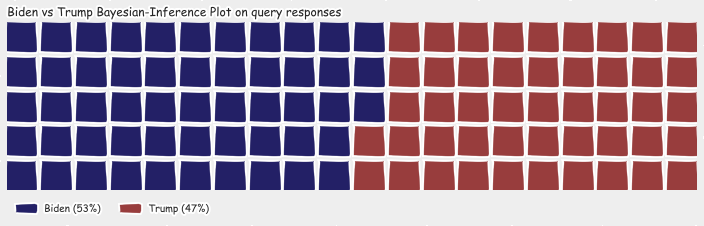

In [143]:
data = {'Biden': round(p_biden_given_each_query * 100), 'Trump': round(p_trump_given_each_query * 100)}

fig = plt.figure(
    FigureClass=Waffle, 
    rows=5, 
    font_size=14,
    values=data, 
    colors=["#232066", "#983D3D"],
    title={'label': 'Biden vs Trump Bayesian-Inference Plot on query responses', 'loc': 'left'},
    labels=[f"{k} ({v}%)" for k, v in data.items()],
    legend={'loc': 'lower left', 'bbox_to_anchor': (0, -0.2), 'ncol': len(data), 'framealpha': 0},
    starting_location='NW',
    block_arranging_style='snake',
    figsize=(10,10)
)
fig.set_facecolor('#EEEEEE')
plt.show()